# The Explainer Notebook

**Structure of this notebook**

The notebook consists of six parts; [Motivation](#part1), [Downloading data](#part2), 
[Data cleaning & Preprocessing](#part3), [Basic Statistics](#part4), [Tools, theory and analysis](#part5), [Discussion](#part6) and [Contributions](#part7).

In the first part regarding motivation a description of the project goal is provided alongside an explanation of the dataset used. The dataset is downloaded in the *Downloading data section* and then cleaned and preprocessed. 

In the Data cleaning & Preprocessing part additional information about each artist is found by using regular expression on the downloaded txt. files. The additional information contributes with a deeper understanding of data. Which is covered in the Basic Statistics section. The Basic Statistics aims to get an understanding of the dataset by using explorative statistics. This section provides an initial understanding of the data and an idea of what to investigate further. 

The Tools, theory and analysis part contains two main parts; Network Analysis and Text Analysis. Each of these are divided into further sub-analyses. In the beginning of each sub-analysis a short presentation of theory and purpose is made. Throughout this section the tools will be explained when they are applied. At the end of each sub-analysis, the outcome is commented on.

The Discussion will both discuss main results, data quality and further work.

In the end of the explainer notebook the Contribution describes which part of the project each member has been responsible for. 

<a id='part1'></a>
# Part 1: Motivation

## 1.1 Motivation and goal
***
 *While every country has it's own language, there is only one language we can all understand. The Language of Music.*
***

Music is an important part of the everyday life. It is almost inevitable to come across music in a regular every day. Whether it is music on the radio, TV, at a party, in the bus or just pure background noice from different sources. Music undeniable affects our life. And it is important.   

    It brings us together  
    It can improve health and wellbeing  
    It can improves confidence and resilience  
    It is a creative outlet  
    and last but not least; Music is fun.  

(At least according to this [article](https://www.bbc.co.uk/teach/bring-the-noise/five-reasons-why-music-is-important/zv3krj6).)  

Music all comes down to the artists. If there are no artists, there are no songs to listen to. How does the artists links to one another and what kind of information can be derived from the different groupings? We know of a lot of icons that for a long time have dominated the hitlists. How are these represented in the data?  

Music affects us in some way or another. But which words are we actually hearing when we put on our headphones? What kind of messages are we exposing ourselves to? Are they in general negative or positive? How is the mood in the songs that we most often choose to listen to? We know of countless of love songs. Are these represented in the data? Or what other topics dominate the data?   



These are questions that this study seeks to answer. The aim of this study is to investigate different artists and compare different genres to achive deeper insight into the music industri. Prior to starting the study the scope of the project should be limited. There are quite frankly too many artists across the world for this study to take them all into account with the limited computer power that we possess. Hence in order to make it manageble this study will focus on the following five music genres.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[RnB](https://en.wikipedia.org/wiki/List_of_R%26B_musicians)&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;[Pop](https://en.wikipedia.org/wiki/List_of_dance-pop_artists)&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;[Hiphop](https://en.wikipedia.org/wiki/List_of_hip_hop_musicians)&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;[Rock](https://en.wikipedia.org/wiki/List_of_alternative_rock_artists)&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;[Country](https://en.wikipedia.org/wiki/List_of_country_music_performers)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

## 1.2 Data

The data for the study is based on the Wikipedia lists of important artists within each genre to limit the scope of artists in the network. The wikipedia lists can be found on the links above.   

For the network analysis each artist will be represented as a node, whereas the edges between the nodes represents wheather an artists page links to another artist. In this way the network will illustrate which artists are connected to other artists based on their wiki-pages. The amount of links between two artist is the weight of the edges which is used later on in the network analysis. The data consists of the following attributes.

<table>
<colgroup>
<col width=10% />
<col width=10% />
<col width=80% />
</colgroup>
<thead>
<tr class="header">
      <th>Attribute</th>
      <th>Type</th> 
      <th>Description</th>
</tr>
</thead>
<tbody>
<tr>
    <td><code>name</code></td> 
    <td>str</td> 
    <td>Name of the artist as written in the wikipedia list</td>
</tr>
<tr>
    <td><code>link_name</code></td> 
    <td>str</td> 
    <td>This attribute takes the same value as the name attribute, with the exception of links that are redirected. When running the wikipedia API some of the the values in the name attributes redirects to a wikipedia page with a different name. Furthermore all spaces are replaced with underscore </td>
</tr>
<tr>
    <td><code>genre</code></td> 
    <td>str</td> 
    <td>The genre that the artist belongs to. It is possible for an artist to be in multiple genres. In such cases this attribute will take on multiple values that are separated by commas</td>
</tr>
<tr>
    <td><code>origin</code></td> 
    <td>str</td> 
    <td>The origin of the artist</td>
</tr>
    <td><code>lat</code></td> 
    <td>float</td> 
    <td>The latitude of the origin</td>
</tr>
<tr>
      <td><code>lon</code></td> 
    <td>float</td> 
    <td>The longitude of the origin</td>
</tr>
<tr>
      <td><code>start_year</code></td> 
    <td>str</td> 
    <td>The starting year of an artists carreer</td>
</tr>
<tr>
   <td><code>end_year</code></td> 
    <td>str</td> 
    <td>The ending year of an artists carreer. The attribute will be equal to 'Present' if an artist is still active</td>
</tr>
</tr>
<tr>
   <td><code>genius_id</code></td> 
    <td>str</td> 
    <td>The artists id on Genius</td>
</tr>
<tr>
   <td><code>followers_count</code></td> 
    <td>str</td> 
    <td>The number of followers that an artist have on Genius</td>
</tr>
</tbody>
</table>

For the sentiment analysis and topic modelling the genius API will be used to extract songs. To represent the genres the most polular songs are extracted from the most polular artists within each genre. Due to the limits of computer power the dataset contains 50 songs/artists from each genre leading to a total datasize of 250 songs.

This study is based on a sample of the whole music industri and the results provides only an indication of patterns within the whole industri. 

**Libaries**   
The libraries used for this project are presented and imported below.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
from fa2 import ForceAtlas2
import json
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import math
import collections
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from geopy.geocoders import Nominatim
from pyvis.network import Network
from itertools import count
import nltk
from nltk import word_tokenize, sent_tokenize, wordpunct_tokenize, pos_tag
from nltk.tokenize import WordPunctTokenizer, RegexpTokenizer
from nltk.corpus import stopwords, PlaintextCorpusReader, wordnet
from nltk.stem import WordNetLemmatizer 
from stopwords import get_stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gensim
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
from gensim import corpora, models
import community.community_louvain as community
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, GeoJSONDataSource, \
                        LinearColorMapper, ColorBar, NumeralTickFormatter, Div, Select, TableColumn, \
                        DataTable, CheckboxGroup, Tabs, Panel, CheckboxButtonGroup, RadioButtonGroup, \
                        Label, LabelSet, Range1d
from bokeh.io import show, output_notebook, curdoc, output_file
from bokeh.embed import file_html
from bokeh.resources import CDN
import lyricsgenius 
import plotly.io as pio
from scipy import integrate
import heapq
import cartopy.crs as ccrs
output_notebook()

Loading BokehJS ...

<a id='part2'></a>
# Part 2: Downloading data

**Data for the network analysis**

In the following code the list of artists is downloaded from the five different wikipedia pages 
[RnB](https://en.wikipedia.org/wiki/List_of_R%26B_musicians), [Pop](https://en.wikipedia.org/wiki/List_of_dance-pop_artists), [HipHop](https://en.wikipedia.org/wiki/List_of_hip_hop_musicians), [Rock](https://en.wikipedia.org/wiki/List_of_alternative_rock_artists), [Country](https://en.wikipedia.org/wiki/List_of_country_music_performers).

The data is downloaded by using the wikipedia API, which is a way of communicating with the web. Regular expressions are also used in order to obtain the name of each artist. The names are then saved in a `pandas DataFrame`. The result of the following code chunk is five different dataframes (one for each genre) with the names of all artists. The dataframes are saved as five different `.csv` files.   

In the following code the function `replaceunicode` is applied. This function decodes the wikipedia text. The function is written under the section [Functions](#part9). 

In [ ]:
# Creating a list of all five wikipedia page titles
titles = ["titles=List_of_R%26B_musicians", "titles=List_of_dance-pop_artists", "titles=List_of_hip_hop_musicians", 
         "titles=List_of_alternative_rock_artists", "titles=List_of_country_music_performers"]

#Creating a list of all five genres
genres = ["RnB", "Pop", "HipHop", "Rock", "Country"]

# Defining the wikipedia API
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

#Defining the pattern, which are used for extracting the name of all artists from the wiki pages
pattern = '\*\[\[(.*?)(?:\|.*?)?]\]'

# Looping through all five wiki pages (one for each genre)
for title in titles: 
    for genre in genres: 
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat) #using the wikipedia API
        response = urllib.request.urlopen(query)
        data = response.read() # reading the wiki pages
        wiki = replaceunicode(data.decode('utf-8')) # decoding the wiki text
        artist_names = re.findall(pattern, wiki) # using regular expression to extract the names
        df = pd.DataFrame({'name': artist_names,'genre':[genre]*len(artists_names)}) # creating a dataframe for the given genre
        df['name_'] = df.name.replace(' ','_',regex=True) # creating a name_ column where spaces are replaced with _
        df.to_csv(r'df_{}.csv'.format(genre)) # saving the given dataframe as a csv file

The names of all artists have now been downloaded. In the following code the dataframes are combined to a single dataframe. 

In [ ]:
#Reading the five csv files
df_rnb = pd.read_csv('./df_RnB.csv', index_col=0)
df_pop = pd.read_csv('./df_Pop.csv', index_col=0)
df_hiphop = pd.read_csv('./df_HipHop.csv', index_col=0)
df_rock = pd. read_csv('./df_Rock.csv', index_col=0)
df_country = pd. read_csv('./df_Country.csv', index_col=0)

In [ ]:
#Combining the dataframes into one dataframe
frames = [df_rnb, df_pop, df_hiphop, df_country, df_rock]
df = pd.concat(frames)

The following code loops through all artists in the big dataframe in order to read and save the wikipedia page of all artists. Some of the names are redirected when inserted into the wiki API. If this happens the code will save the redirected name and use that in the API instead. This is nessecary in order to obtain the text of all artists. 
Furthermore some of the names contains a '/' which is a invalid value in the name of a .txt. file. Hence if this happens, the '/' is replaced with '_'. 

> `Warning:` Please be aware that the following code takes a really long time to run.


In [ ]:
pages_path = "./Musicians_files/" # Setting the path to where the files should be shaved

for name in df.name_: # Loops through all artists 
    # Defining the wiki API
    baseurl = "https://en.wikipedia.org/w/api.php?" 
    action = "action=query"
    title = "titles="+urllib.parse.quote_plus(name)
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)  # Using the wiki API
    response = urllib.request.urlopen(query) 
    data = response.read() # Reading the wiki page of the artist
    wikitext = replaceunicode(data.decode('utf-8')) # Decoding the text          
    if "#REDIRECT" in wikitext: # If a text is redirected then use the redirected name in the wiki API
        re_dir = re.findall("REDIRECT[ ]{0,1}\[\[(.*?)(?:\|.*?)?]\]", wikitext)[0].replace(' ','_') # Redirected name
        title = "titles="+urllib.parse.quote_plus(re_dir)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat) # Using the wiki API 
        response = urllib.request.urlopen(query)
        data = response.read() # Reading the wiki page of the artist
        wikitext = replaceunicode(data.decode('utf-8'))  # Decoding the text  
         # Writing the text into a .txt file
        f = open(pages_path + f"{re_dir}.txt","w+")
        f.write(wikitext)
        df.loc[df.name_ == name, 'name_w_redir'] = re_dir #Saving the redirected name in the dataframe
    else:
        if '/' in name: # If a name contains a '/' 
            name_new = name.replace('/', '_')
            # Writing the text into a .txt file
            f = open(pages_path + f"{name_new}.txt","w+")
            f.write(wikitext)
            df.loc[df.name_ == name, 'name_w_redir'] = name_new
        else:
            # Writing the text into a .txt file
            f = open(pages_path + f"{name}.txt","w+") 
            f.write(wikitext)
            df.loc[df.name_ == name, 'name_w_redir'] = name 

In [ ]:
#Saving the updated dataframe (with the new column name_w_redir)
df.to_csv('df_all5.csv')

<a id='part3'></a>
# Part 3: Data cleaning & Preprocessing

Before proceeding to the Basic Statistics the data needs to be cleaned and preprocessed. This will be done in this section.   

Furthermore the data saved in the file named `df_all5.csv` contains only very basic information about the artists in the form of the name and genre. In this section the `.txt` file for each artist will therefore be used in order to extract more usefull information about the artists.    

To begin the csv file containing all artists/bands from all 5 genres is downloaded. 

In [ ]:
#Reading the dataframe
df = pd.read_csv('./df_all5.csv',index_col=0)

In [ ]:
#Renaming the 'name_w_redir' column
df=df.rename(columns={'name_w_redir':'link_name'})

In [ ]:
print("The dataframe consist of", len(df), "artists")

The dataframe consist of 6459 artists


In the dataset there exist duplicates on the subset (`genre`, `link_name`). An example on this is the band named 'Blaque'. Both of the rows shown down below redirects to the wikipage named 'Blaque'. Hence one of these rows should be dropped.

In [ ]:
df[df.link_name=='Blaque']

name genre            name_ link_name
40            Blaque   RnB           Blaque    Blaque
681  Brandi Williams   RnB  Brandi_Williams    Blaque

In total there are 31 rows that appears as duplicates on the subset (`genre`, `link_name`). In the following code these are dropped.

In [ ]:
duplicateRowsDF = df[df.duplicated(['genre', 'link_name'])].sort_values('link_name')
print("A total of",len(duplicateRowsDF),"rows should be dropped") 

A total of 31 rows should be dropped


In [ ]:
#dropping all duplicates on the subset 'genre', 'link_name'
df=df.drop_duplicates(subset=['link_name','genre']).reset_index()

In [ ]:
print("The dataframe now consist of", len(df), "artists")

The dataframe now consist of 6428 artists


In the inital dataframe an artist can have multiple rows if they appear in multiple genres (like Beyoncé). 
The genre is redefined, such that it appears as a string with of genres. If an artist appears in multiple genres the genres will be separated by commas in the string. 

In [ ]:
df[df.name == 'Beyoncé']

index     name genre    name_ link_name
30      30  Beyoncé   RnB  Beyoncé   Beyoncé
745     38  Beyoncé   Pop  Beyoncé   Beyoncé

In [ ]:
#Create a dictionary with key=artist name and the value is a list of genres. 
dict_genre = collections.defaultdict(list)
for k, v in zip(df['name'], df['genre']):
    dict_genre[k].append(v)

In [ ]:
#Add all genres to the genre column, so that there only is one row per artist
for name in df.name: 
    if len(dict_genre[name])==1:
        df.loc[df.name == name, 'genre'] = dict_genre[name]
    else:
        df.loc[df.name == name, 'genre'] = ', '.join([str(elem) for elem in dict_genre[name]])

In [ ]:
#Dropping dublicates
df=df.drop_duplicates(subset='link_name').reset_index()
df = df.drop(['level_0'], axis=1)

In [ ]:
df[df.name == 'Beyoncé']

index     name     genre    name_ link_name
30     30  Beyoncé  RnB, Pop  Beyoncé   Beyoncé

In the dataframe the 12 last rows consist are wrongfully loaded and have to be dropped:

In [ ]:
df.tail(13)

index                               name genre  \
6256   1291                               Zwan  Rock   
6257   1292  List of alternative metal artists  Rock   
6258   1293          List of Britpop musicians  Rock   
6259   1294          List of dream pop artists  Rock   
6260   1295          List of gothic rock bands  Rock   
6261   1296          List of indie pop artists  Rock   
6262   1297       List of indie rock musicians  Rock   
6263   1298      List of industrial rock bands  Rock   
6264   1299           List of math rock groups  Rock   
6265   1300          List of post-grunge bands  Rock   
6266   1301    List of post-punk revival bands  Rock   
6267   1302            List of post-rock bands  Rock   
6268   1303       List of shoegazing musicians  Rock   

                                  name_                          link_name  
6256                               Zwan                               Zwan  
6257  List_of_alternative_metal_artists  List_of_alternative_metal_artists  
6258          List_of_Britpop_musicians          List_of_Britpop_musicians  
6259          List_of_dream_pop_artists          List_of_dream_pop_artists  
6260          List_of_gothic_rock_bands        List_of_gothic_rock_artists  
6261          List_of_indie_pop_artists          List_of_indie_pop_artists  
6262       List_of_indie_rock_musicians       List_of_indie_rock_musicians  
6263      List_of_industrial_rock_bands     List_of_industrial_music_bands  
6264           List_of_math_rock_groups           List_of_math_rock_groups  
6265          List_of_post-grunge_bands          List_of_post-grunge_bands  
6266    List_of_post-punk_revival_bands    List_of_post-punk_revival_bands  
6267            List_of_post-rock_bands            List_of_post-rock_bands  
6268       List_of_shoegazing_musicians       List_of_shoegazing_musicians

In [ ]:
#Removing all rows with 'List of...' in its name
for name in df.name:
    if 'List of' in name:
        df = df.drop(df[df.name == name].index)

In [ ]:
df = df.drop(df[df.index == 5507].index)

In [ ]:
#Saving as a csv file
df.to_csv('df_all5_nodupli.csv')

**Adding attributes**

The wikipages contains a lot of relevant information about the artists/bands. In the following sections attributes describing the artists/bands will be extracted from their wikipages using regular expression.

**Adding `origin`**   
The origin is added by extracting information about the birth place/origin from the saved wiki pages. The origin is stated in different ways in the `.txt` files, hence multiple regular expressions/patterns are needed. 

In [ ]:
# Patterns that finds all origins 
origin_pattern1 = 'birth_place += +(?:\.*?)\[\[(.*?)(?:\|.*?)?]\]'
origin_pattern2 = 'origin += +(?:\.*?)\[\[(.*?)(?:\|.*?)?]\]'
origin_pattern3 = 'birth_place\s+\=\s+\{\{nowrap\|\[\[(.*?)(?:\|.*?)?]\]'
origin_pattern4 = 'origin\s+\=(.+?),'

In [ ]:
pages_path = "./Musicians_files/" #Path to where the .txt files are saved

for name in df.link_name: #Loops through all artists
    with open(pages_path+name+".txt","r") as f: #open the .txt file of the artist
        txtfile = f.read() # Read the .txt file
        origin = re.findall(origin_pattern1, txtfile) # Search the text with the first pattern
        if not origin: # If the first pattern did not find anything use pattern 2 
            origin = re.findall(origin_pattern2, txtfile)
        if not origin: # If the second pattern did not find anything use pattern 3
            origin = re.findall(origin_pattern3, txtfile)
        if not origin: # If the third pattern did not find anything use pattern 4
            origin = re.findall(origin_pattern4, txtfile)
        if len(origin) > 0: # If an origin was found, then save the origin to the column 'origin'
            df.loc[df.link_name==name,'origin'] = " ".join(origin)   
        else:
            df.loc[df.link_name==name,'origin'] = 'Unknown'

In [ ]:
df.head(3)

index     name        genre    name_ link_name                 origin
0      0  Aaliyah  RnB, HipHop  Aaliyah   Aaliyah          New York City
1      1    Adele          RnB    Adele     Adele                 London
2      2  After 7          RnB  After_7   After_7  Indianapolis, Indiana

In [ ]:
print(len(df[df['origin']== 'Unknown']), "rows have an unknown origin")

324 rows have an unknown origin


In [ ]:
print(len(df[df.origin.isna()]))

0


**Adding longitude and latitude: `lon` and `lat`**

> `Warning:` Please be aware that the following code takes a really long time to run.

In [ ]:
df = df.reset_index()

In [ ]:
geolocator = Nominatim(user_agent="s184288@student.dtu.dk")

for i in range(len(df.origin)): #Loop through all elements in the 'origin' column
    orig = df.loc[i]['origin']
    if orig == 'Unknown': # Skip the artists that have an Unknown origin
        continue
    else:
        try: 
            location = geolocator.geocode(orig) #find the location based on origin
        except: pass
        if location != None: #If the location can be find, then add information about latitude and longitude
            df.loc[i,'lat'] = location.latitude
            df.loc[i,'lon'] = location.longitude

        else: pass #If the location cannot be found the value is set to NaN

In [ ]:
df.to_csv('df_w_loc.csv')

**Adding years active: `start_year` and `end_year`**  
We can also add information about the starting and end date of the artists/bands carreer.   
Some artists have breaks in their carreer, which means that multiple years can be stated in their information about 'Years active', e.g. the danish band [Aqua](https://en.wikipedia.org/wiki/Aqua_(band)). In this project the `start_year` is defined as their first year active and their `end_year` is defined as their last year active. Some artists is still active, thus for these artists their `end_year` will be set to 'Present'.

In [ ]:
#Regular expression that findes all text in between 'years active' and the next information in the text
years_active_pattern = r'years_active\s+=(.+?)='

In [ ]:
pages_path = "./Musicians_files/" #Path to where the .txt files are saved

for name in df.link_name: #Loop through all artists
    with open(pages_path+name+".txt","r") as f: #open the .txt file of the artist
        txtfile = f.read() #read the .txt file
        years_active = re.findall(years_active_pattern, txtfile) #use the pattern to find the years
        if len(years_active) > 0: #if years were found then add the result to the 'years_active' column 
            df.loc[df.link_name==name,'years_active'] = " ".join(years_active) 
        else:
            df.loc[df.link_name==name,'years_active'] = 'Unknown'

In [ ]:
#Finds the start_year
for index in df.index: #loop through all artists
    year_val = re.findall(r'\d{4}', df['years_active'][index]) #find the first year in the string 
    if not year_val: #if no year is found then set the value to Unknown, else insert the first year as start_year
        df.loc[index,'start_year']='Unknown'
    else: 
        df.loc[index,'start_year']=year_val[0]

In [ ]:
print(len(df[(df['start_year'] == 'Unknown')]), "rows have an unknown start_year")

433 rows have an unknown start_year


In [ ]:
#Find the end_year
for index in df.index: #loop through all artists
    if 'present' in df['years_active'][index]: #If 'present' appear in the string, then set end_year to 'Present'
        df.loc[index,'end_year']='Present'
    else: #else find the last year in the string
        year_val = re.findall(r'\d{4}', df['years_active'][index]) 
        if not year_val: #if no year is found then set the value to Unknown, else insert the last year as end_year
            df.loc[index,'end_year']='Unknown'
        else: 
            df.loc[index,'end_year']=year_val[-1]

In [ ]:
print(len(df[(df['end_year'] == 'Unknown')]), "rows have an unknown end_year")

430 rows have an unknown end_year


**Adding genius id and number of followers: `genius_id` and `followers_count`**  
The genius id and number of followers is found by using the Genius API. 
> `Warning:` Please be aware that the following code takes a really long time to run.

In [ ]:
geniusCreds = "aCQh7LLS717JOZEveiE1-Vc6ifPi6V0ZVmHNf2BAc7xMjfaWXVVO3Ce1t8X2VqmG" 
genius = lyricsgenius.Genius(geniusCreds)

for name in df.name: #loop through all artists
    #while loop ensures that the code keep running until all id's is found.
    while True: 
        try:
            artist = genius.search_artists(name) #extract information about the artist 
            id_list = re.findall(r'\'id\'\: (\d+),',str(artist)) #finds the id of the artist by using regex
            if len(id_list)>0: #If id is found, then insert value into 'genius_id' column
                artist_id = id_list[0]
                df.loc[df.name==name,'genius_id'] = artist_id
            else: #If id is not found, then insert 'Unknown' into 'genius_id' column
                artist_id = "Unknown"
                df.loc[df.name==name,'genius_id'] = artist_id
            break
        except:
            pass

In [ ]:
print(len(df[(df['genius_id'] == 'Unknown')]), "rows have an unknown genius_id")

985 rows have an unknown genius_id


The amount of followers is found by using the [RapidAPI page](https://rapidapi.com/brianiswu/api/genius/). Hence a user have been created in order to use their API. 
> `Warning:` Please be aware that the following code takes a really long time to run.

In [ ]:
headers = {'x-rapidapi-host': "genius.p.rapidapi.com",
            'x-rapidapi-key': "37416947d2msha96476eb1d1e3ecp1caf7fjsna98cfa0f54c5"}

for artist_id in df.genius_id: #loop through all artists
    if artist_id != "Unknown": #If the artist have a genius id, then use the Rapid API to find the text of the artist from Genius
        url = "https://genius.p.rapidapi.com/artists/"+artist_id
        response = requests.request("GET", url, headers=headers)
        followers = re.findall(r'\"followers_count\"\:(\d+),',str(response.text)) #find the amount of followers using regex
        df.loc[df.genius_id==artist_id,'followers_count'] = followers[0]
    else: #if no followers was found then set the value to 'Unknown'
        df.loc[df.genius_id==artist_id,'followers_count'] = "Unknown"

In [ ]:
#saving as a csv file
df.to_csv('df_all5_attri.csv')

The data is now ready for analysis.

<a id='part4'></a>
# Part 4: Basic statistics

This section will give an introduction to the considered dataset.   

**Genre distribution:**  
To begin with the genre distribution will be presented. It is important to look at the distribution in order to conclude whether or not the data is dominated by a genre. The genre distribution is plotted using the `plot_attribute_dist` function, which can be seen under the section [Functions](#part9) (make sure to run the function before use).

In [ ]:
#Read the data 
df = pd.read_csv('./df_all5_attri.csv',index_col=0)

Before looking at the genre distribution a flattened dataframe is created. This is due to the fact that an artist can be in multiple genres. If the list is not flattened the genres would take values such as *'RnB, HipHop'*, but in this case we only wish to see the five genres overall. 

In [ ]:
#Flatten the dataframe on the attribute 'genre'
pattern_flatten = re.compile(r'\w+') 
flatten_list = pattern_flatten.findall(str(list(df.genre)))

#count the number of unique values 
values, counts = np.unique(flatten_list, return_counts=True)

#The genre distribution is plotted and saved as html file
plot_attribute_dist(values, counts, "genre_dist.html")

From the above plot it can be seen how the genres **HipHop** and **Country** is the largest genres in the data, while the genre **Pop** is the smallest.

**Active artists over time:**   
Active artists is defined as artists that at a given time have started their carreer and not yet ended it. It is useful to look at the active artists over time, as it gives a good understanding of the data, that we are dealing with. Music have existed for ages, but it keeps developing and new artists keep emerging. Furthermore Wikipedia is a modern invention, hence it is interesting to see which artists that are represented in wikipedia and how many over the years.

The function `active_count` is defined below and computes the number of active artists per year

In [ ]:
#function to count how many active artists there are each year
def active_count(df):
    year_range = np.arange(np.min(df['start_year']),2022,1)
    new_df = pd.DataFrame(index = year_range, data = {'counts':0})
    
    for row in df[['start_year','end_year']].itertuples():
        new_df.counts[(year_range >= row.start_year) & (year_range <= row.end_year)] += 1
    
    return new_df

*Active artists total*

In [ ]:
df_time = df.copy()
#Replace 'Present' with 2021
df_time.end_year = df_time.end_year.replace('Present',2021)
#Sort out artists where their start_year and end_year is unknown
df_time = df_time[~((df_time.start_year == 'Unknown') | (df_time.end_year == 'Unknown'))]
#Change the type of start_year and end_year to integer
df_time = df_time.astype({'start_year': 'int', 'end_year': 'int'})

#using the function active_count
year_counts = active_count(df_time)
year_counts['index_new'] = year_counts.index

### Plot 1: Active artists total ###
fig = figure(width=600, height=400, title='Active artists over time (total)', x_axis_label='Year', 
               y_axis_label='Active artists')
fig.line('index_new', 'counts', color='lightblue', line_width=2, source=year_counts,legend_label="All genres")
fig.add_tools(HoverTool(tooltips=[('Count', "@counts")]))

# axis ticks
fig.legend.location ="top_left"
fig.title.text_font_size = '13pt'
fig.title.align = 'center'

*Active artists divided into genres*

In [ ]:
#Making a dataframe where an artist can appear in multiple rows, if it appears in multiple genres
df_flatten=df.set_index('name').genre.str.extractall(r'(\w+)').reset_index(level=0) 
df_drop = df.drop(['level_0','index','genre','name_', 'link_name'], axis=1)
df_flatten = df_flatten.merge(df_drop, how='left', on='name')

#Replace 'Present' with 2021
df_flatten.end_year = df_flatten.end_year.replace('Present',2021)
#Sort out artists where their start_year and end_year is unknown
df_flatten = df_flatten[~((df_flatten.start_year == 'Unknown') | (df_flatten.end_year == 'Unknown'))]
#Change the type of start_year and end_year to integer
df_flatten = df_flatten.astype({'start_year': 'int', 'end_year': 'int'})

#Running the 'active_count' function for each of the genres
year_counts_rnb = active_count(df_flatten[df_flatten.iloc[:,1] == 'RnB'])
year_counts_rnb['index_new'] = year_counts_rnb.index
year_counts_pop = active_count(df_flatten[df_flatten.iloc[:,1] == 'Pop'])
year_counts_pop['index_new'] = year_counts_pop.index
year_counts_hiphop = active_count(df_flatten[df_flatten.iloc[:,1] == 'HipHop'])
year_counts_hiphop['index_new'] = year_counts_hiphop.index
year_counts_rock = active_count(df_flatten[df_flatten.iloc[:,1] == 'Rock'])
year_counts_rock['index_new'] = year_counts_rock.index
year_counts_country = active_count(df_flatten[df_flatten.iloc[:,1] == 'Country'])
year_counts_country['index_new'] = year_counts_country.index

### Plot 2: Active artists (genre) ### 
graph = figure(width=600, height=400, title = "Active artists over time (genres)", x_axis_label='Year', 
               y_axis_label='Active artists') 

# the points to be plotted 
xs = [year_counts_rnb.index_new, year_counts_pop.index_new, year_counts_hiphop.index_new, 
     year_counts_rock.index_new, year_counts_country.index_new] 
ys = [year_counts_rnb.counts, year_counts_pop.counts, year_counts_hiphop.counts, 
     year_counts_rock.counts, year_counts_country.counts] 

colors_list = ["#008080", "#DA70D6", "#4B0082", "red", "blue"]
legend_list = ["RnB", "Pop", "HipHop", "Rock", "Country"]

for (colr, leg, x, y ) in zip(colors_list, legend_list, xs, ys):
    my_plot = graph.line(x, y, color= colr, legend_label= leg, line_width=2)
    graph.add_tools(HoverTool(tooltips=[('Count', "$y{int}")]))
    
# axis ticks
graph.legend.location ="top_left"
graph.title.text_font_size = '13pt'
graph.title.align = 'center'

Plotting active artists (total) and actives artists (genres): 

In [ ]:
# Create two panels, one for each plot
fig_panel = Panel(child=fig, title='Active artists (total)')
graph_panel = Panel(child=graph, title='Active artists (genres)')

# Assign the panels to Tabs
tabs = Tabs(tabs=[fig_panel, graph_panel])

# Show the tabbed layout
show(tabs)

#Save as html file
output_file("output_file_name.html")

In the above plot there is a tab showing a plot of the number of active artists over time across all genres. This plot shows a large increase in the amount of artists in the years around 1980 to 2010. In the second tab there is a plot of the active artists over time divided into the different genres. Based on this plot it can be concluded that HipHop is the largest genre, while Pop is the smallest genre. Futhermore it can be seen how HipHop has a rather rapid increase compared to all other genres.

**Followers**  
The information about followers can give an indication of which artists are popular and thereby which artists that might dominate the network. To begin with it is interesting to look at the average degree in each genre. From the genre distribution it was clearly HipHop and Country who dominated the data. Thus it is interesting to see if these genres also dominate in terms of average amount of followers.

In [ ]:
#Only look at the artists where the followers_count is known
df_flatten = df_flatten[df_flatten['followers_count'] != "Unknown"]

In [ ]:
#Change the type of 'followers_count' to numeric
df_flatten['followers_count']= pd.to_numeric(df_flatten.followers_count)

Computing the average amount of followers for each genres

In [ ]:
new_df = df_flatten.groupby(df_flatten.iloc[:,1]).mean()
print('Average amount of followers in each genre:')
print(new_df["followers_count"])

Average amount of followers in each genre:
0
Country     13.913499
HipHop     376.063335
Pop        353.353712
RnB        208.325926
Rock        94.263308
Name: followers_count, dtype: float64


In terms of average amount of followers it is once again HipHop that dominate. One should also notice that Pop, who is the smallest genre in terms of artists, actually have the second highest amount of average followers. Furthermore Country have the lowest amount of average followers, dispite the fact that it is the second largest genre in the data. Based on the above table it can also be seen how the average amount of followers on Genius in general is quite low compared to other social medias. It is interesting to look at the top 5 artists with most followers within each genre, as it might support this tendency.

In [ ]:
#Creating a dataframe with the top 5 artists in each genre with most followers
top5_df = (df_flatten.sort_values('followers_count', ascending=False)
        .groupby(df_flatten.iloc[:,1], sort=False).head(5))

In [ ]:
#The following makes sure that an artist can be plotted multiple times if it is in two genres
top5_df.name = top5_df.name.where(~top5_df.name.duplicated(), top5_df.name + ' ')
#Plotting 
fig = px.bar(top5_df, y='followers_count', x='name', text='followers_count', 
             color=top5_df.iloc[:,1], color_discrete_sequence=np.unique(color_list), 
             title="Top 5 artists with most followers",  color_discrete_map={
            'RnB': '#008080',
            'Pop': '#DA70D6', 
            'HipHop': '#4B0082', 
            'Rock': "red", 
            'Country': "blue"}, 
            labels=dict(followers_count="Amount of followers", name="Artist name", color="Genre"))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.write_html('followers.html')
fig.show()

From the above plot it can be seen how the HipHop genre in general have more followers than any of the other genres. Futhermore it can be seen how the artist with most followers is Kendrick Lamar with 26.291 followers. If this value is compared with his amount of followers on [spotify](https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg) (30.2M monthly listeners) and [instagram](https://www.instagram.com/kendricklamar/?hl=da) (9.7M followers) it is a very small amount. Hence this indicates that people in general do not use Genius to any great extent. Thus the amount of followers do not show a true picture of the reality. 

<a id='part5'></a>
# Part 5: Tools, theory and analysis

**Introduction** 

The study contains three analysis, network analysis, sentiment analysis and topic modeling.

## 5.1 Network analysis

**Introduction** 

In this part of the study the network will be created and analyzed. The network will be created such that nodes represents artists and links represents links between wikipedia pages. If an artist's page links to another artist's page these nodes will share a directed link. Thus the initial network is directed. From the initial network the Giant Connected Component (GCC) will be extracted and analyzed. Due to a high degree density a backbone analysis with a disparity filter will be carried out. The result of the backbone analysis is a smaller network, where only significant links appear. The backbone network will be used for further analysis. Due to the way that the links are weighted in the backbone analysis, the network needs to be undirected. Therefore, the network is saved as an undirected network, which forms the foundation of the rest of the analysis. In the end communities are created in an attempt to figure out, how well the network actually represents common assumptions of linkages between music artists.

**Network creation**   
To begin with the network is created by creating a directed graph in which a node is added for each character. Attributes are added to the nodes from the dataframe. Hereafter the column `link_name` is used to search through the nodes/artists wiki pages and create links from the links to other pages.

In [ ]:
#Read the data
df = pd.read_csv('./df_all5_attri.csv',index_col=0)

In [ ]:
pages_path = "./Musicians_files/" #Path to where the .txt files are saved

DG = nx.DiGraph() #Creating directed graph 
DG.add_nodes_from(df['link_name']) #Adding one node for each character
node_attr = df[['link_name','genre','origin','start_year','end_year', 
                'followers_count']].set_index('link_name').to_dict('index') #Creating a dictionary with the characters and their attributes
nx.set_node_attributes(DG, node_attr) #Adding attributes to the graph

In [ ]:
#Adding edges
pattern = '\[\[(.*?)(?:\|.*?)?]\]'

for i in df.link_name:
    with open(pages_path+i+".txt","r") as f:              #open all characters txt files
        node_links = f.read()                             #read txt file
        word_count=len(re.findall(r'\w+', node_links))
        link_list = re.findall(pattern, node_links)     #using pattern to find links
        DG.nodes[i]['length'] = word_count
        for j in link_list:
            j_weight = link_list.count(j) #weight is set to the number of times a link occur
            j = j.replace(' ','_')
            if j in df.link_name.values:
                DG.add_edge(i,j, weight = j_weight) #adding edges and their weight

In [ ]:
print("The network consist of: ", DG.number_of_edges(), " links")
print("The network consist of: ", DG.number_of_nodes(), " nodes (musicians)")

The network consist of:  68130  links
The network consist of:  6254  nodes (musicians)


Because we already have a lot of nodes and links, and we do not want artists in the network who are too unknown (no links) we extract the GCC from the network. For visualisation purposes we also make the network undirected.

In [ ]:
#Extracting the largest component
largest_cc = max(nx.weakly_connected_components(DG), key=len)
sub_G=DG.subgraph(largest_cc).copy()
#Saving the largest component as a undirected network
G = sub_G.to_undirected()

In [ ]:
print("The GCC consist of: ", sub_G.number_of_edges(), " links")
print("The GCC consist of: ", sub_G.number_of_nodes(), " nodes (musicians)")

The GCC consist of:  68117  links
The GCC consist of:  5942  nodes (musicians)


**The density of connections**

Later on, the so called backbone of the network will be extracted. This is in part because the large number of links in the network, which in part can be seen from the average degree. The graph has a high density of connections, ⟨k⟩ = 19, making difficult both its analysis and visualization.

In [ ]:
print("The average degree of the GCC is:", round(sum(dict(G.degree()).values())/len(G.degree)))

The average degree of the GCC is: 19


**Degree distribution**

Next we look into the degree distribution of the network. In the figure below this is shown for each of the genres. If you want to compare the genres separately, then click their respective name in the legend on the left. Also, keep in mind the total number of artists in each genre shown in the Basic stats section when looking at the scale-difference here.

The next code cells first prepares the data for plotting, and then visualises the degree distribution of all genres in the same plot.

In [ ]:
#Saving nodes in lists according to their genre
n_pop = [x for x,y in sub_G.nodes(data=True) if y['genre']=='Pop']
n_rnb = [x for x,y in sub_G.nodes(data=True) if y['genre']=='RnB']
n_hip = [x for x,y in sub_G.nodes(data=True) if y['genre']=='HipHop']
n_rock = [x for x,y in sub_G.nodes(data=True) if y['genre']=='Rock']
n_cou = [x for x,y in sub_G.nodes(data=True) if y['genre']=='Country']

In [ ]:
#Degree distribution:
deg_pop = np.array(list(dict(sub_G.degree(n_pop)).values()))
deg_rnb = np.array(list(dict(sub_G.degree(n_rnb)).values()))
deg_hip = np.array(list(dict(sub_G.degree(n_hip)).values()))
deg_rock = np.array(list(dict(sub_G.degree(n_rock)).values()))
deg_cou = np.array(list(dict(sub_G.degree(n_cou)).values()))

#Finding the unique values and how many time they appear 
values_pop, counts_pop = np.unique(deg_pop, return_counts=True)
values_rnb, counts_rnb = np.unique(deg_rnb, return_counts=True)
values_hip, counts_hip = np.unique(deg_hip, return_counts=True)
values_rock, counts_rock = np.unique(deg_rock, return_counts=True)
values_cou, counts_cou = np.unique(deg_cou, return_counts=True)

In [ ]:
#Plotting the degree distribution for each genre
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=values_in_pop, y=counts_in_pop, name='Pop',line=go.scatter.Line(color="#DA70D6")),
    row=1, col=1)

fig.add_trace(go.Scatter(x=values_in_rnb, y=counts_in_rnb, name='Rnb',line=go.scatter.Line(color="#008080")),
    row=1, col=1)

fig.add_trace(go.Scatter(x=values_in_hip, y=counts_in_hip, name='HipHop',line=go.scatter.Line(color="#4B0082")),
    row=1, col=1)

fig.add_trace(go.Scatter(x=values_in_rock, y=counts_in_rock, name='Rock',line=go.scatter.Line(color="red")),
    row=1, col=1)

fig.add_trace(go.Scatter(x=values_in_cou, y=counts_in_cou, name='Country',line=go.scatter.Line(color="blue")),
    row=1, col=1)

fig.update_layout(title_text="Degree distribution for each genre", 
                  plot_bgcolor='rgba(0,0,0,0)', hovermode="x unified", width=800, height=500)

# Update xaxis properties
fig.update_xaxes(title_text="Degree", row=1, col=1)
fig.update_xaxes(title_text="Degree", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5)

fig.show()
#pio.write_html(fig, file='deg.html', auto_open=False)

The degree distribution of the genres seems most reminiscent of a power-law distribution, but the genres Hip Hop and Rock could also be fitted with a Poisson distribution. It is also noticeable that there clearly are a few artists in each category with a lot more links than the rest of the artists.

Next we are plotting the difference in In-degree and out-degree of the directed GCC:

In [ ]:
#In-degree distribution:
In_degrees = np.array(list(dict(sub_G.in_degree()).values()))
values_in, counts_in = np.unique(In_degrees, return_counts=True)

#Out-degree distribution:
Out_degrees = np.array(list(dict(sub_G.out_degree()).values()))
values_out, counts_out = np.unique(Out_degrees, return_counts=True)

#Plotting
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=values_in, y=counts_in, name='In-deg. count'),
    row=1, col=1)

fig.add_trace(go.Scatter(x=values_out, y=counts_out, name='Out-deg. count'),
    row=1, col=2)

fig.update_layout(title_text="In-degree distribution (left) and out-degree distribution (right)", 
                  plot_bgcolor='rgba(0,0,0,0)', hovermode="x unified", width=800, height=500)

# Update xaxis properties
fig.update_xaxes(title_text="In-Degree", row=1, col=1)
fig.update_xaxes(title_text="Out-Degree", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color=['rgb(8,48,107)'], marker_line_width=1.5)

fig.show()
#pio.write_html(fig, file='deg.html', auto_open=False)

**Top 15 most connected artists**  
In the following the 15 most connected artists are presented. These are found by computing the degree of each artist. 

In [ ]:
#Saving the degree of each artist 
degrees = [val for (node, val) in DG.degree()] 
df_DG=df.set_index('link_name').loc[list(DG.nodes())] 
df_DG['deg'] = degrees

#Printing the name, genre and degree of the 15 most connected artists
html_tab=df_DG[['name','genre','deg']].nlargest(15,'deg').reset_index().drop('link_name',axis=1)
html_tab.to_html(open('table_deg.html', 'w'))
html_tab.T

0       1       2          3           4       5   \
name   Kanye West  Eminem   Jay Z  Lil Wayne  Snoop Dogg     Nas   
genre      HipHop  HipHop  HipHop     HipHop      HipHop  HipHop   
deg           429     398     395        366         348     288   

                    6            7       8         9              10  \
name   Michael Jackson  Johnny Cash    T.I.   Beyoncé  Willie Nelson   
genre         RnB, Pop      Country  HipHop  RnB, Pop        Country   
deg                285          281     275       274            273   

              11             12       13            14  
name   Bob Dylan  Elvis Presley  Dr. Dre  Busta Rhymes  
genre    Country        Country   HipHop        HipHop  
deg          269            260      257           256

From the above table it can be seen how all 15 of the most connected artists are wellknown artists. Furthermore 9 out of the 15 artists belong to the HipHop genre. This is in good compliance with HipHop being the largest genre in the network. 



**Drawing the network**  
The network is drawn in the code sections below. The function [Force Atlas](https://github.com/bhargavchippada/forceatlas2) in under the section [Functions](#part9) helps determine the positions of the nodes.

In [ ]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)

100%|██████████| 100/100 [00:07<00:00, 13.63it/s]

Repulsion forces  took  6.99  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.14  seconds


In [ ]:
#Setting up node sizes (depends on degree)
d = dict(G.degree)
deg_size = [v * 3 for v in d.values()]

In [ ]:
#Setting up node colors (depends on genre)
nodes_color = []
for node in G.nodes.data():
    if node[1]['genre'] == 'RnB':
        nodes_color.append('#008080')
    elif (node[1]['genre'] == 'Pop'):
        nodes_color.append('#DA70D6')
    elif (node[1]['genre'] == 'Country'):
        nodes_color.append('blue')
    elif (node[1]['genre'] == 'Rock'):
        nodes_color.append('red')
    elif (node[1]['genre'] == 'HipHop'):
        nodes_color.append('#4B0082')
    else:
        nodes_color.append('#FFFF00')

The network is now plotted using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function, and node-coordinates from the force atlas algorithm. 

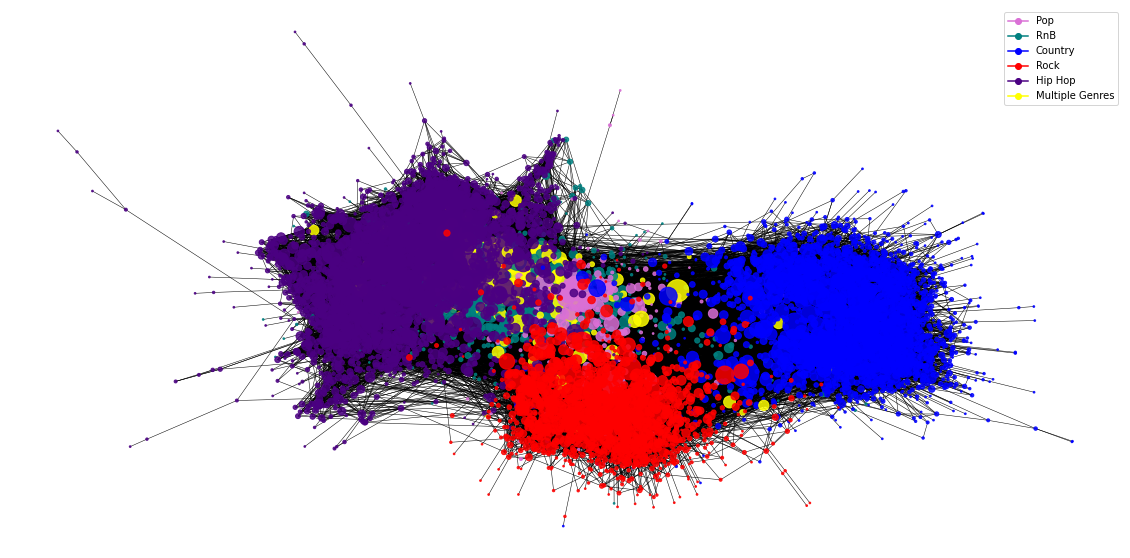

In [ ]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, positions, node_size=deg_size, node_color=nodes_color, alpha=0.85)
nx.draw_networkx_edges(G, positions, width = 0.5)#, edge_color=edge_colors,width=0.5)

#adding legends to the network plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0],marker='o', color='#DA70D6', label='Pop'),
                Line2D([0], [0], marker='o', color='#008080', label='RnB'),
                Line2D([0], [0], marker='o', color='blue', label='Country'),
                Line2D([0], [0], marker='o', color='red', label='Rock'),
                Line2D([0], [0],marker='o', color='#4B0082', label='Hip Hop'),
                Line2D([0], [0],marker='o', color='#FFFF00', label='Multiple Genres')]
plt.legend(handles=legend_elements, loc='upper right')

plt.axis('off')
#plt.savefig('big_net.png')
plt.show()

Due to the large number of nodes and links, it is close to impossible to identify the specific connections in the network. However, it is remarkable, that there is clear separation between the different genres. The top left part of the network is dominated by Hip Hop artists. The red and blue nodes, representing Rock and Country artists respectively, are equally isolated in different parts of the network graph. The RnB artists are located very close to the Hip Hop artist, which makes sense when relating it to the common conception about the similarities in these genres. Also, it has been discovered for the yellow nodes – namely, the artists contained in multiple genres – that most of these artists are exactly in both the Hip Hop and RnB categories. When it comes to the Pop artists, their position in the middle of the network graph also conceptually matches with the fact, that many Pop artists will use elements from different genres to be “popular” for everyone.   


*Summary:*  
Even though there are clear more nodes with few connections than many, the average degree of the network is above 19. This, together with the fact that the network is visually very difficult to inspect, have led to a Backbone Analysis of the network.

### Backbone Analysis
The method for extracting the backbone can then be carried out according to the presented technique in this [article](https://www.pnas.org/content/pnas/106/16/6483.full.pdf) from 2009 by M. A. Serrano et al. The purpose of the method is find a significance level α for which a sufficient amount of link-weight is kept in the network, while the total number of edges is greatly reduced. In order to select suitable significance level α we look at the figure below. On the left we se $N_B/N_T$ as a function of $W_B/W_T$ at different significance levels, where N is nodes and W is weight and the subscripts B and T refers to the backbone and total network repectively. To the right we se $N_B/N_T$ against the number of edges $E$ kept at different significans levels.  

In order to conduct the backbone analysis, the links of the network should be weighted in a way that represents the importance of the indivial links. For this analysis the weight of a link is chose to be equal to the number of times it is included on the wiki pages - in both directions. This means that if node i mentions node j two times, and node j mentions node i once, then the resulting weight of the link will be 3. This leads to the conclusion, that the network must be undirected for this weighting to be possible. 

In [ ]:
# Add weights when there are links in both directions
for node in sub_G:
    for ngbr in nx.neighbors(sub_G, node):
        if node in nx.neighbors(sub_G, ngbr):
            G.edges[node, ngbr]['weight'] = (
                G.edges[node, ngbr]['weight'] + G.edges[ngbr, node]['weight'])

The function `disparity_filter` written in section [Functions](#part9) is from this page: [github, backbone](https://github.com/aekpalakorn/python-backbone-network/blob/master/backbone.py)  
The function is used to find the backbone of the network. Different values of $\alpha$ is tested in the following section in order to find the optimal value.

In [ ]:
alpha_val = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] #Values of alpha to test for backbone
number_nodes = [] #Empty list to save number of nodes in each backbone
number_edges = [] #Empty list to save number of edges in each backbone
weights = []      #Empty list to save total weight in each backbone

#Running the disparity_filter function on the undirected GCC (G)
G_backbone = disparity_filter(G)
print('original: nodes = %s, edges = %s' % (G_backbone.number_of_nodes(), G_backbone.number_of_edges()))
print('--------------------------------')
#Calculating the total weight in the graph: 
total_weight = 0
for u, v, d in G_backbone.edges(data=True):
    total_weight += d['weight']

#Looping through all alpha values
for alpha in alpha_val: 
    sum_weight = 0
    G2_backbone = nx.Graph([(u, v, d) for u, v, d in G_backbone.edges(data=True) if d['alpha'] < alpha ])
    print('alpha = %s' % alpha)
    print('backbone: nodes = %s, edges = %s' % (G2_backbone.number_of_nodes(), G2_backbone.number_of_edges()))
    number_nodes.append(G2_backbone.number_of_nodes())
    number_edges.append(G2_backbone.number_of_edges())
    for u, v, d in G2_backbone.edges(data=True):
        sum_weight += d['weight']
    weights.append(sum_weight)

original: nodes = 5942, edges = 57537
--------------------------------
alpha = 0.01
backbone: nodes = 3193, edges = 3508
alpha = 0.05
backbone: nodes = 3843, edges = 5919
alpha = 0.1
backbone: nodes = 4134, edges = 7523
alpha = 0.2
backbone: nodes = 4487, edges = 9660
alpha = 0.3
backbone: nodes = 4692, edges = 10853
alpha = 0.4
backbone: nodes = 4977, edges = 12500
alpha = 0.5
backbone: nodes = 5426, edges = 15385


From the output above it is clearly seen that the number of nodes and edges is decreasing as the value of $\alpha$ is decreased. By decreasing the value of $\alpha$ the more significant links are kept.  

Plotting the fraction of nodes kept in backbones as a function of respectively the weight and the number of edges retained by the different $\alpha$-filters. 

In [ ]:
#Plotting
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Scatter(x=[val / total_weight for val in weights], y=[val / G_backbone.number_of_nodes() for val in number_nodes],
    mode="lines+text",
    text=[r"$\alpha=0.01$", r"$\alpha=0.05$", r"$\alpha=0.1$", 
          r"$\alpha=0.2$", r"$\alpha=0.3$", r"$\alpha=0.4$", r"$\alpha=0.5$"],
    textposition="bottom center"),
    row=1, col=1)

fig.add_trace(
    go.Scatter(y=[val / G_backbone.number_of_nodes() for val in number_nodes], x=[val / G_backbone.number_of_edges() for val in number_edges],
    mode="lines+text",
    text=[r"$\alpha=0.01$", r"$\alpha=0.05$", r"$\alpha=0.1$", 
          r"$\alpha=0.2$", r"$\alpha=0.3$", r"$\alpha=0.4$", r"$\alpha=0.5$"],
    textposition="bottom center"),
    row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="$W_B/W_T$", row=1, col=1)
fig.update_xaxes(title_text="$E_B/E_T$", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="$N_b/N_T$", row=1, col=1)
fig.update_yaxes(title_text="$N_b/N_T$", row=1, col=2)

# Update title and height
fig.update_layout(title_text="Fraction of nodes kept in backbones as a function of the fraction of weight (left) and edges (right) retained by the filters", 
                 height=500, font_size=10, plot_bgcolor='rgba(0,0,0,0)',showlegend=False)

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
pio.write_html(fig, file='alpha_vals.html', auto_open=False)
fig.show()

Below is a table showing the sizes of the disparity backbones in terms of the percentage of total weight, nodes and edges for different values of the significance level $\alpha$.

| $$\alpha$$ | $$\%W_T$$ | $$\%N_T$$ | $$\%E_T$$ |
| ---   | ---  | ---  | ---  |
| 0.5   | 73.0 | 93.0 | 38.0 |
| 0.4   | 66.6 | 85.6 | 27.5 |
| 0.3   | 60.2 | 79.5 | 20.8 |
| 0.2   | 51.6 | 73.6 | 15.0 |
| 0.1   | 40.5 | 62.1 | 9.0  |
| 0.05  | 33.0 | 50.6 | 6.2  |
| 0.01  | 19.4 | 31.7 | 2.8  |

It is obviously a bit subjective decision that have to be made on which significance level that is be chosen. But we argue in this case, that because the weight kept is more or less directly proportional to the value of α, then we can choose from looking mostly at the right graph of the edges kept. Here it is clear that there up to α = 0.1 we get to remove more edges than at higher α values - therefore this is the chosen significance level. 

In [ ]:
# Our chosen alhpa
alpha_val = 0.1

# Use alpha to select/remove links
G2_backbone = nx.Graph([(u, v, d) for u, v, d in G_backbone.edges(data=True) if d['alpha'] < alpha_val ])
print('alpha = %s' % alpha_val)
print('original: nodes = %s, edges = %s' % (G_backbone.number_of_nodes(), G_backbone.number_of_edges()))
print('backbone: nodes = %s, edges = %s' % (G2_backbone.number_of_nodes(), G2_backbone.number_of_edges()))

alpha = 0.1
original: nodes = 5942, edges = 57537
backbone: nodes = 4134, edges = 7523


### Analysis of backbone network

This section seeks to inspect the backbone network further. This is done first by looking at the distribution of artits in the different genres again. Then we compare the new network to the old by looking at the most connected nodes/artists and the degree distribution.

First, the network is built again with attributes:

In [ ]:
# Set node attributes for the network
node_attr = df[['link_name','genre','origin','start_year','end_year', 'followers_count']].set_index('link_name').to_dict('index') #Creating a dictionary with the characters and their attributes
nx.set_node_attributes(G2_backbone, node_attr) #Adding attributes to the graph

In [ ]:
# Extract the Giant connected component again
largest_cc = max(nx.connected_components(G2_backbone), key=len)
GCC_bb=G2_backbone.subgraph(largest_cc).copy()

Below the distribution of artits in the different genres is shown again. Clearly, the difference in number of nodes in the genres has not changed a lot since before extracting the backbone. This is good, as it indicates we can keep most of the node information without all the links.

In [ ]:
# Plot distribution on the genres
values, counts = np.unique(list(nx.get_node_attributes(G2_backbone, 'genre').values()), return_counts=True)
plot_attribute_dist(values, counts, 'backbone.html')

In [ ]:
# Flatten genre attribute so that one artist can appear in more than one
pattern_flatten = re.compile(r'\w+')
flatten_list = pattern_flatten.findall(str(list(nx.get_node_attributes(GCC_bb, 'genre').values())))

# Plot distribution on the genres
values, counts = np.unique(flatten_list, return_counts=True)
plot_attribute_dist(values, counts, 'backbone_5genres.html')

**Top connected artists/bands**

To compare the backbone to the old network we also look at the 15 most connected artists again. Most of them are the same as before the backbone was extracted, but there are also some differences. E.g. Michael Jackson is no longer in the top 15 most linked artists. Instead there is some new names such as Missy Elliot and Mariah Carey.

In [ ]:
#Getting the top connected character (total-degree)
top_15 = sorted(G2_backbone.degree, key=lambda x: x[1], reverse=True)[:15]

In [ ]:
#Creating a dataframe with top 20
names = []
for i in range(0,15): 
    name = top_20[i][0]
    names.append(name)

df_top15 = pd.DataFrame()
for name in names:
    df_top15 = df_top15.append(df.loc[df.link_name == name])

# Declares a list of the degrees is to be converted into a column
degrees = []
for i in range(0,15): 
    degree = top_15[i][1]
    degrees.append(degree)

# Using 'Total-degree' as the column name and equating it to the list
df_top15['Total_degree'] = degrees

In [ ]:
output_notebook()
x = df_top15.Total_degree
genres = df_top15.genre
factors = df_top15.link_name.str.replace('_',' ')

fig = figure(title="Top 15 most connected artist/bands", toolbar_location=None,tools="hover", 
             tooltips="Degree: @x", 
y_range=factors, x_range=[0,45], plot_width=800, plot_height=500)

fig.segment(0, factors, x, factors, line_width=2, line_color="#3182bd",
            hover_line_width=1)

cir= fig.circle(x, factors, size=15, fill_color="#9ecae1", line_color="#3182bd", line_width=3,
          hover_line_width=1)

fig.hover.renderers = [cir]

fig.xgrid.grid_line_color = None
fig.ygrid.grid_line_color = None

show(fig, notebook_handle = True)

#output_file('top_15.html', mode='inline')

Loading BokehJS ...

**Degree distribution**

Again, to compare with the old network, the degree distribution is plotted again for the backbone network. As expected the degrees are generally much lower, and the distribution seems to follow a power-law distribution very well.

In [ ]:
#total-degree distribution:
degrees_total = np.array(list(dict(GCC_bb.degree()).values()))
values, counts = np.unique(degrees_total, return_counts=True)

fig = px.line(x=values, y=counts, width=800, height=500)
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="degree distribution of backbone network", 
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_title="Count",
                  xaxis_title="Degree",
                  hovermode="x unified")

fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.show()
#pio.write_html(fig, file='in_deg.html', auto_open=True)

**Drawing the backbone network**

Again we draw the network to illustrate the difference from before to after the backbone analysis.

In [ ]:
positions = forceatlas2.forceatlas2_networkx_layout(GCC_bb, pos=None, iterations=100)

100%|██████████| 100/100 [00:01<00:00, 52.61it/s]

Repulsion forces  took  1.75  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


In [ ]:
#node size
d = dict(GCC_bb.degree)
deg_size = [v * 7 for v in d.values()]

In [ ]:
print('backbone: nodes = %s, edges = %s' % (GCC_bb.number_of_nodes(), GCC_bb.number_of_edges()))

backbone: nodes = 2955, edges = 4701


In [ ]:
nodes_color = []
    
for node in GCC_bb.nodes.data():
    if node[1]['genre'] == 'RnB':
        nodes_color.append('#008080')
    elif (node[1]['genre'] == 'Pop'):
        nodes_color.append('#DA70D6')
    elif (node[1]['genre'] == 'Country'):
        nodes_color.append('blue')
    elif (node[1]['genre'] == 'Rock'):
        nodes_color.append('red')
    elif (node[1]['genre'] == 'HipHop'):
        nodes_color.append('#4B0082')
    else:
        nodes_color.append('#FFFF00')

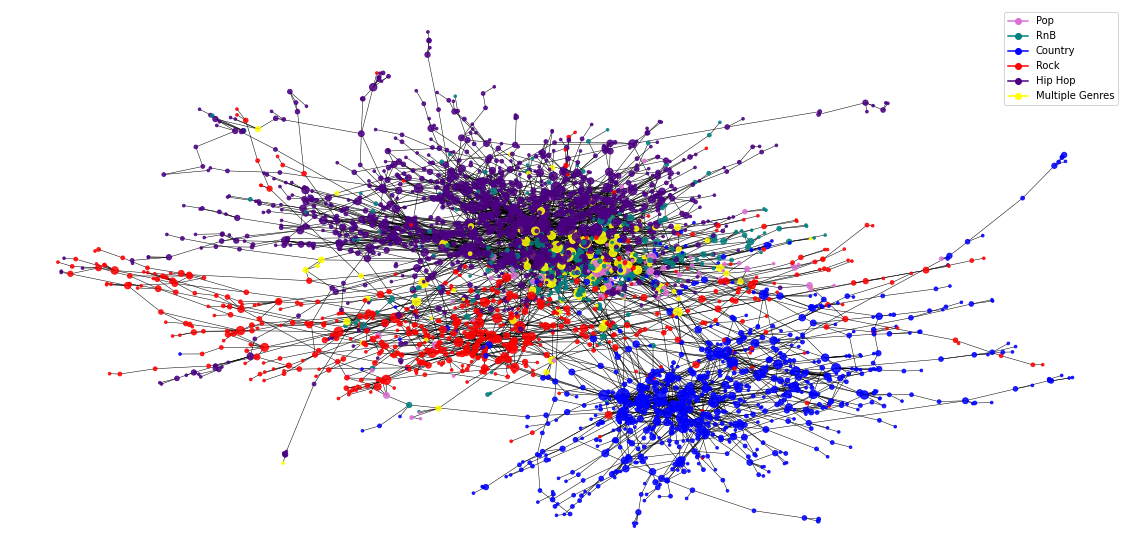

In [ ]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(GCC_bb, positions, node_size=deg_size, node_color=nodes_color, alpha=0.85)
nx.draw_networkx_edges(GCC_bb, positions, width = 0.5)#, edge_color=edge_colors,width=0.5)

#adding legends to the network plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0],marker='o', color='#DA70D6', label='Pop'),
                Line2D([0], [0], marker='o', color='#008080', label='RnB'),
                Line2D([0], [0], marker='o', color='blue', label='Country'),
                Line2D([0], [0], marker='o', color='red', label='Rock'),
                Line2D([0], [0],marker='o', color='#4B0082', label='Hip Hop'),
                Line2D([0], [0],marker='o', color='#FFFF00', label='Multiple Genres')]
plt.legend(handles=legend_elements, loc='upper right')

plt.axis('off')
plt.savefig('Backbone.png')
plt.show()

When the backbone is extracted, it looks like the network shown above. The number of nodes have been reduced to 2955 and the number of links to 4701. This means that we get to keep more than 60% of the nodes while only retaining less than 10% of the links, and that is exactly what the goal of this section is about. In the network visualisation above it is also evident, that we still have good seperation between the genres, even with a lot fewer links.

### Communities

Now that the network only contains what we find to be the "important" links, the communities are found. This is done with the <a href="https://en.wikipedia.org/wiki/Louvain_method">Louvain algorithm</a>, which is an approximation algorithm that tries to maximize the modularity score $Q$ (Guillaume et al., 2008).

In [ ]:
#Set seed
np.random.seed(1000)

# computing best community partition
partition = community.best_partition(GCC_bb)

# Get a set of the communities
communities = set(partition.values())

In [ ]:
#Number of communities (+1 because community "0" also exist)
print('Number of communities:', max(partition.values())+1)

Number of communities: 38


In [ ]:
L = GCC_bb.number_of_edges() #number of edges in the full network
M = 0 # initiating M

for i in range(0, max(partition.values())): #loop for all comminities
    com_list=[]
    for key, value in partition.items():
        df.loc[df.link_name == key, 'community'] = value #creating new column in orig. dataframe
        if value == i: #check if community in partition is equal to the community we are looking at currently
            com_list.append(key) 
    subG = GCC_bb.subgraph(com_list).copy() #subgraph of community
    L_c = subG.number_of_edges() #edges in subgrpah
    k_c = sum([subG.degree(n) for n in subG.nodes()]) #sum of degrees in subgraph
    
    #computing M
    M +=  L_c/L-(k_c/(2*L))**2 

print('Modularity of Backbone GCC:', np.round(M,3))

Modularity of Backbone GCC: 0.76


When implemented on the backbone network, we end up with 38 communities and a modularity score of $Q = 0.76$, which indicates a fairly good partition (Barabási, 2015).

Next, the communities are renamed after the 3 nodes within each of them with the highest degree. This will make interpretation of the communities much easier.

In [ ]:
#Rename communities
#Find largest degree nodes in each com.
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}
highest_degree = {k: heapq.nlargest(3, v, key=lambda x: GCC_bb.degree(x)) for k, v in communities_dict.items()}

#Add column to community dataframe with community names
for key, values in highest_degree.items():
    df.loc[df.community == key, 'com_name'] = ", ".join(values).replace('_',' ') 

**Community sizes**

As mentioned, a goal with the network analysis is to study whether or not the communities compare to the some common conception about the artists relations. Therefore, the number of artists within each genre in each community is also below below. Clearly, a lot of the communities are dominated by a a single genre, but there are also expections such as the communities <code>Nicki Minaj, Chris Brown, Beyoncé</code> and <code>Mariah Carey, Whitney Houston, Michael Jackson</code>. Remember again here, that there are not equally many artists in each genre in the whole network, and therefore these two communities can be seen as quite "diverse". 

In [ ]:
# Select artists in communities and count for each genre in each community
plot_df = df[df.community.isna()==False].groupby(['com_name','genre'])['name'].count()

# Unstack to get wide data format
plot_df = plot_df.unstack(1).fillna(0)

# Compute the count of artists in multiple genres and a total column
plot_df['Multiple Genres'] = plot_df.drop(['Pop','RnB','HipHop','Country','Rock'],axis=1).sum(axis=1)
plot_df['total'] = plot_df.drop('Multiple Genres',axis=1).sum(axis=1)

# Sort dataframe
plot_df = plot_df[['Pop','RnB','HipHop','Country',
                   'Rock','Multiple Genres','total']].sort_values(by='total',ascending=False)

In [ ]:
# Plot distribution of community sizes
fig = px.bar(plot_df, x=plot_df.index, y=['Pop','RnB','HipHop','Country','Rock','Multiple Genres'], width=800, 
             height=500, color_discrete_sequence=["#DA70D6", "#008080", "#4B0082", "blue", "red",'#FFFF00'])
# Set plot options
fig.update_traces(hovertemplate=None)
fig.update_layout(title_text="Community sizes", 
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_title="Count",
                  xaxis_title='',
                  hovermode="x unified",
                  font=dict(size=6))

# Update background and grid
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.show()
#pio.write_html(fig, file='com_size.html', auto_open=False)

**Interactive plot of selected communies**

To look closer at some of the largest communities, an interactive visualisation can be seen below. Here the two country communities <code>Carrie Underwood, Reba McEntire, Taylor Swift</code> and <code>Johnny Cash, Willie Nelson, Elvis Presley</code> are shown together with the rock community <code>Nirvana (band), Radiohead, Alice in chains</code>, and the Hip Hop communities <code>Eminem, Dr. Dre, Snoop Dogg</code> and <code>Kanye West, Drake (musician), Rihanna</code>. Futhermore the two mixed communities <code>Mariah Carey, Whitney Houston, Michael Jackson</code> and <code>Nicki Minaj, Chris Brown, Beyoncé</code> are included.

In [ ]:
# Dataframe of artists in communities
df_com=df[df.com_name.isna()==False]

# Country communities
set1=set(df_com[df_com.com_name.str.contains('Elvis')].link_name.values)
set2=set(df_com[df_com.com_name.str.contains('Emmylou')].link_name.values)
set3=set(df_com[df_com.com_name.str.contains('Taylor Swift')].link_name.values)

# Rock communities
set4=set(df_com[df_com.com_name.str.contains('Nirvana')].link_name.values)
set5=set(df_com[df_com.com_name.str.contains('Marr')].link_name.values)
set6=set(df_com[df_com.com_name.str.contains('Alanis')].link_name.values)

# Pop/Rnb/variety communities
set7=set(df_com[df_com.com_name.str.contains('Nicki')].link_name.values)
set8=set(df_com[df_com.com_name.str.contains('Michael Jackson')].link_name.values)
set9=set(df_com[df_com.com_name.str.contains('Pussycat')].link_name.values)

# Hiphop communities
set10=set(df_com[df_com.com_name.str.contains('Eminem')].link_name.values)
set11=set(df_com[df_com.com_name.str.contains('Kanye')].link_name.values)
set12=set(df_com[df_com.com_name.str.contains('XXX')].link_name.values)

In [ ]:
# Subgraphs for the ones we want to show
com1_G=GCC_bb.subgraph(set1).copy()
com3_G=GCC_bb.subgraph(set3).copy()
com4_G=GCC_bb.subgraph(set4).copy()
com7_G=GCC_bb.subgraph(set7).copy()
com8_G=GCC_bb.subgraph(set8).copy()
com10_G=GCC_bb.subgraph(set10).copy()
com11_G=GCC_bb.subgraph(set11).copy()

# Combine the sub-graphs to one network (without links between)
c = nx.union(com1_G,com3_G)
c = nx.union(c,com4_G)
c = nx.union(c,com7_G)
c = nx.union(c,com8_G)
c = nx.union(c,com10_G)
c = nx.union(c,com11_G)

In [ ]:
# PyVis plot
net = Network(height='500px', width='100%', bgcolor='white', font_color='black',notebook=True)

# Add nodes from the union network of selected communities
net.from_nx(c)

# Get neighbors
neighbors = net.get_adj_list()

#Adding node atributes
for node in net.nodes:
    node['value'] = len(neighbors[node['id']])               # Size of nodes = degree
    genre = df.loc[df.link_name==node['id']]['genre'].values # Extract genre
    # Color from genre
    if genre == 'RnB':
        node['color'] = '#008080'
    elif genre == 'Pop':
        node['color'] = '#DA70D6'
    elif genre == 'Country':
        node['color']='blue'
    elif genre == 'Rock':
        node['color']='red'
    elif genre == 'HipHop' :
        node['color']='#4B0082'
    else:
        node['color']='#FFFF00'
    node['label'] = node['label'].replace('_', ' ')          # Replace _ in node names

# Show and save html
net.show('test_com.html')

The output from the above code can be viewed at the [website](https://thelanguageofmusic.github.io/artists/network.html). It is the plot below the barplot showing the community sizes. 
You can zoom in on the different communities to look at the individual artists in each of them. If you are into music, you will hopefully agree, that most of the artists are in a community that seems sensible. There are of course also examples of nodes/artists that might not seem to belong in their community, e.g. DJ Tiësto and Swedish House Mafia might not be a natural inclusion with Nirvana and the other rock bands. Another thing to notice is how the two mixed communities also have more yellow nodes. The fact that these artists who are in multiple genres are represented more in these communities could indicate, that they also can act as links between artists in different genres.

**Community partition analysis**

We have now seen how the genres generally offer a good explanation for the community partition. However, one thing that is still left unanswered is what causes there to be multiple cummunities dominated by the same genres and not just a single one. In the next section we seek to explain some of this by looking into time and space attributes  of the communities. The graph below shows when the artists from a selection of communities started their careers. 

In [ ]:
# Slice dataframe to contain the relevant communities and count artists in each start_year
plot_df=df[df.link_name.isin(set1|set3|set7|set8|set10|set11|set12)&(df.start_year!='Unknown')].\
    groupby(['com_name','start_year'])['name'].count()

# Rename multiindex and unstack to get wide data format
plot_df.index.names = ["Community", "Start Year"]
plot_df = plot_df.unstack(0).fillna(0)

# Make start_year int.type
plot_df.index=plot_df.index.astype(int)

# Add missing years to the index/start_year
plot_df = plot_df.reindex(list(range(plot_df.index.min(),plot_df.index.max()+1)),fill_value=0)

# Reorder columns
plot_df=plot_df[['Carrie Underwood, Reba McEntire, Taylor Swift','Johnny Cash, Willie Nelson, Elvis Presley',
    'Eminem, Dr. Dre, Snoop Dogg','Kanye West, Drake (musician), Rihanna','XXXTentacion, Lil Durk, Juice Wrld',
    'Mariah Carey, Whitney Houston, Michael Jackson','Nicki Minaj, Chris Brown, Beyoncé']]

In [ ]:
# Defining colors for plot
colors = ['#B2BEB5','#818589',"#89CFF0","#0096FF","#5F9EA0",'#40B5AD','#097969','#355E3B']

# Plotting start_year distribution for each selected community
fig = px.scatter(plot_df, x=plot_df.index, y=plot_df.columns, width=800, height=500, 
              color_discrete_sequence = colors)

# Update plot options
fig.update_traces(hovertemplate=None,fill='tozeroy',mode='lines')
fig.update_layout(title_text="Start year of artists in selected communities", 
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_title="Count",
                  hovermode="x unified",
                  font=dict(size=7))

# Update background and grid
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.show()
#pio.write_html(fig, file='com_year.html', auto_open=False)

If one selects the first two communities on the legend to the right of the graph, you will se that there indeed is some temporal difference between these two Country communities. Most of the artists in <code>Johnny Cash, Willie Nelson, Elvis Presley</code> started their career around the 1960s, where the artists in <code>Carrie Underwood, Reba McEntire, Taylor Swift</code> mostly started their career after 1980. The exact same can be seen if you instead select the next three communities - namely the hip hop communities. Here we see that most of the artists in <code>Eminem, Dr. Dre, Snoop Dogg</code> started their career between 1985-1995, in <code>Kanye West, Drake (musician), Rihanna</code> they started between 2004 and 2014 and in the community of new rappers <code>XXXTentacion, Lil Durk, Juice Wrld</code> almost all started after 2010. Again, for the last two communities before refered to as to mixed communities, the same can be said.

The next explanation the separation of communities is related to where in the world the artits come from.

In [ ]:
# Select latitude and longitude of the two rock communities and create tuples
pos_dict1=df[df.link_name.isin(set5)].set_index('link_name')[['lon','lat']].agg(tuple, 1).to_dict()
pos_dict2=df[df.link_name.isin(set6)].set_index('link_name')[['lon','lat']].agg(tuple, 1).to_dict()

# Make subgraphs of the two communites
map_G1 = GCC_bb.subgraph(list(pos_dict1.keys()))
map_G2 = GCC_bb.subgraph(list(pos_dict2.keys()))

In [ ]:
# Map projection
crs = ccrs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(1, 1, figsize=(40, 20), subplot_kw=dict(projection=crs))

# Add coastlines
ax.coastlines()
ax.set_global()

# Plot first rock community
nx.draw(map_G1, ax=ax,
                 font_size=2,
                 alpha=.5,
                 width=.075,
                 node_size=40,
                 pos=pos_dict1,
                 node_color='green',
                 cmap=plt.cm.autumn)

# Plot second rock community
nx.draw(map_G2, ax=ax,
                 font_size=2,
                 alpha=.5,
                 width=.075,
                 node_size=40,
                 pos=pos_dict2,
                 node_color='blue',
                 cmap=plt.cm.autumn)
#fig.savefig('map_rock.png')
fig.show()

On the map above are two of the biggest communities dominated by rock artists shown. The nodes position on the map corresponds to the artist's origin. Here it can be seen how one community almost only originates from North America, while the other community contains a lot of artists from the UK.

**Plotting of backbone by community**

In the network below, the backbone is shown again, now with each community colored according to its community.

In [ ]:
color = []
n = 100 #We create colors

#Generate colors
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

color_list = []
for i in list(partition.values()):
    color_list.append(color[i])  #append color to communities

d = dict(GCC_bb.degree)
deg_size = [v * 10 for v in d.values()]

#plot network
plt.figure(figsize=(25,15))
nx.draw_networkx_nodes(GCC_bb, positions, node_size=deg_size, node_color=color_list, alpha=0.85)
nx.draw_networkx_edges(GCC_bb, positions, width=0.5)#edge_color=edge_colors
plt.title("Undirected GCC network, colored by community", fontsize=20)
plt.axis('off')
plt.show()

### Network analysis outcomes
In this section , the linkage of music artists in and between different genres have been explored. As a result multiple facts can be concluded about the network. Firstly, it can be concluded, that already before the backbone analysis, the genres seem to be a good partitioner for the network. This could be seen in the first network plot on this page. However, it was discovered that the network was so densely connected that further analysis could become difficult, therefore the backbone of the network was extracted. With the disparity filter method applied it was possible to remove more than 90% of the links while still keeping most of the important information. The bachbone network not only made the network more manageable, but is also made it possible to devide the network into communities of sensible sizes. The goal was to evaluate communities on the basis of how well they represent common assumptions of linkages between music artist. This leads to a somewhat subjective judgement of the communities, but all in all it can be concluded that the communities to a large extend represents the linkages one would have assumed. To some extent this can be explained by temporal and spacial attributes and of course the genres of the artists.

## 5.2 Data for the sentiment analysis and topic modeling

The file "GeniusAPIartists.csv" contains the artist infomrations from the network analysis including the number of degrees per artist which will be used later on.
The artists that are not on genuis has been removed for the API to work.

In [ ]:
df = pd.read_csv('./GeniusAPIartists.csv', index_col=0) #Loading the data for the sentiment and topic model
df.head()

name genre     allgenre   link_name                 origin  \
0     Aaliyah   RnB  RnB, HipHop     Aaliyah          New York City   
1       Adele   RnB          RnB       Adele                 London   
2     After 7   RnB          RnB     After_7  Indianapolis, Indiana   
3  Jhené Aiko   RnB  RnB, HipHop  Jhené_Aiko            Los Angeles   
4        Akon   RnB  RnB, HipHop        Akon    St. Louis, Missouri   

                                        years_active start_year end_year  \
0                    1989\u20132001\n| relatives           1989     2001   
1           2006\u2013present\n| spouse                    2006  Present   
2   1987\u20131997; 2006\u2013present\n| label   ...       1987  Present   
3              2002\u2013present\n| label                  2002  Present   
4           1996\u2013present\n| module                    1996  Present   

   degree  
0     4.0  
1     5.0  
2     0.0  
3     3.0  
4    12.0

The length of the dataframe has been calculated to see how many artists that are included in df. The number is fewer than for the network analysis due to some artists not being on genius.

In [ ]:
len(df) #Calculating number of artists

6436

Each song should represent one genre for the sentiment analysis and topic modeling to work perfectly. Otherwise some songs will appear twice. Each artist will therefore only reprsent one genre.

In [ ]:
df=df.drop_duplicates(subset=['link_name']) #Remove duplicates so that each artist only represent one genre

In [ ]:
len(df) #Calculating number of artist without duplicates

6261

The size of the dataframe has been reduced. 

Top 50 artist within each genre has been extracted. This is based on the degree for each artist from the network analysis.

In [ ]:
#Creating a new dataframe with 50 most connected artist for each genre. Five gennres gives 250 artists for the new dataframe
top50=df.groupby('genre').apply(lambda x: x.nlargest(50, 'degree')).reset_index(drop=True) 

Genius API has been used to extract each artist's most listen to song. This song will represent the artist. 

In [ ]:
#Importing the API information
import lyricsgenius as genius
geniusCreds = "aCQh7LLS717JOZEveiE1-Vc6ifPi6V0ZVmHNf2BAc7xMjfaWXVVO3Ce1t8X2VqmG"

In [ ]:
#The following code uses the genius API to find the artist on the ganius page, extract the artist most listen song and save it as a file with the artist name as the file name
liste=[]
pattern = '(\(.*?\))'
path = "./top50/"
api = genius.Genius(geniusCreds)
for i in top50.name:
    try:
        remove_parentese = re.findall(pattern, i)
        remove=''.join(remove_parentese)
        i = i.replace(remove, '')
        artist = api.search_artist(i, max_songs=1)
        artist.save_lyrics()
    except:
        liste.append(i)
        pass

A dataframe for all songs is created

In [ ]:
pattern = '(\(.*?\))'
path = "./top50/"
with open(path+'Lyrics_NickiMinaj.json') as json_data:
        data = json.load(json_data)
        a = pd.DataFrame(data['songs'])

In [ ]:
#This code removes parenteses in some of the artists names in order for the code to find the artist file that was saved by the genius API
for i in range(len(top50.link_name)):
    remove_parentese = re.findall(pattern, top50['link_name'][i])
    remove=''.join(remove_parentese)
    top50['link_name'][i] = top50['link_name'][i].replace(remove, '')

In [ ]:
#This code opens the song files that was saved by the API and adds them to the dataframe
top50['link_name2']=top50['link_name'].replace('_', '', regex=True)
song = pd.DataFrame(columns=[col for col in a.columns])
for i in top50.link_name2:
    with open(path+'Lyrics_'+i+'.json') as json_data:
        data = json.load(json_data)
        df1 = pd.DataFrame(data['songs'])
        song=pd.concat([song,df1])

In [ ]:
#Extract only the important columns
song2=song[['artist','artist_names','title','release_date','lyrics']].reset_index()

The song dataframe is combined with the top50 dataframe so that each song is assigned to a genre for later analysis. 

In [ ]:
result = pd.concat([top50, song2], axis=1) #It is possible to use concat since the artist has the same order in bith dataframes
song=result.copy()

In [ ]:
#We check that all artist got a genre and that the two dataframes was concat correctly
song.tail(3)

Unnamed: 0                         name genre allgenre  \
247         247              John Frusciante  Rock     Rock   
248         248  Jon Spencer Blues Explosion  Rock     Rock   
249         249                  The Killers  Rock     Rock   

                       link_name         origin  \
247              John_Frusciante         Queens   
248  Jon_Spencer_Blues_Explosion  New York City   
249                  The_Killers      Las Vegas   

                                years_active start_year end_year  degree  \
247   1988\u2013present\n| label                   1988  Present     3.0   
248       1991\u20132016<ref>{{Cite web |url       1991     2016     3.0   
249   2001\u2013present\n| label                   2001  Present     3.0   

                   link_name2  index                           artist  \
247            JohnFrusciante      0                  John Frusciante   
248  JonSpencerBluesExplosion      0  The Jon Spencer Blues Explosion   
249                TheKillers      0                      The Killers   

                        artist_names              title release_date  \
247                  John Frusciante  The Will to Death   2004-06-22   
248  The Jon Spencer Blues Explosion        Bellbottoms   1994-10-12   
249                      The Killers     Mr. Brightside   2003-09-29   

                                                lyrics  
247  [Verse 1]\nAnd they're thought to be lies, but...  
248  [Intro]\n(Hey!) Yeah, ha ha\n(Hey!) Like that ...  
249  [Verse 1]\nComing out of my cage and I've been...

## 5.3 Sentiment Alaysis

### Sentiment analysis goal

The purpose of sentiment analysis in our study is to get insight into the emotional part of the songs. We start by looking at the overall picture and investigate the distribution of sentiment, revealing wheather the top listen songs provides a positive or negative message. To get a deeper insight we investigate the sentiment for each genre to see if some genre is more violent/negative than others. Furthermore the study will include an evaluation of the models performance of classifying the sentiment of the songs. In the end we look into the most positive and negative songs and what words discribes the sentiment groups to understand what makes a song negative/positive. Hopefully this part of our study will provide knowledge of the emotional state of songs and how the genres differents on their sentiment. So that you in the future can chose you playlist depending on your mood.

### Sentiment tool

A sentiment analysis model is a machine learning technique that can classify a text as positive, neutral or negative. Analysing language is called Natural Language Processing (NLP) and contains both sentiment analysis and topic modeling which we will cover in this study. For the sentiment analysis the goal is that the model should understand all kind of underlying tones in a text. This includes negation, capitalization, linguistic, context, symboles and sarcasm and takes these into accounting when classifying the sentiment. An example of a negation that the sentiment model should be able to capture can be seen in the sentence, ”I do not like you”. The word like is normally classified as positive, but due to the linguistic structure the words in front of like namely "I do not" yields negation of like, making the sentence negative.

There exist many sentiment analysis models, all for different purpose and each with their stregnth and weaknesses. Due to the often extream word used in songs the choosen model is Vader. Vader(Valence Aware Dictionary for Sentiment Reasoning), is trained on social media data and is therefore caperble of understanding intensity (”!!!”), acronyms (”LOL”) and slang. The model classifies based on full sentence structure since it relies on wordorder. The Vader sentiment model calculates a sentiment score(compound score) on the scale [−1;1] and then sets a threshold to classify the text as positive, neutral or negative. See [The Vader Sentiment Model](https://github.com/cjhutto/vaderSentiment) github page for detailed describtion of the model. For this study we use the Vader sentiment classification which are as followed:

positive: sentiment score >=0.5 
neutral: -0.5 < sentiment score < 0.5 
negative: sentiment score =<-0.5 

The following code calculates the sentiment analysis.

In [ ]:
#Add extra column to the song dataframe to store the sentiment scores for each song
song['Negative']=''
song['Neutral']=''
song['Positive']=''
song['Compound']=''

In [ ]:
#Using Vader sentiment
analyzer = SentimentIntensityAnalyzer()

for i, text in song.iterrows():
    song['Negative'][i]=analyzer.polarity_scores(text['lyrics'])['neg']
    song['Neutral'][i]=analyzer.polarity_scores(text['lyrics'])['neu']
    song['Positive'][i]=analyzer.polarity_scores(text['lyrics'])['pos']
    song['Compound'][i]=analyzer.polarity_scores(text['lyrics'])['compound']

In [ ]:
song.dtypes #Check the type of each column

Unnamed: 0        int64
name             object
genre            object
allgenre         object
link_name        object
origin           object
years_active     object
start_year       object
end_year         object
degree          float64
link_name2       object
index             int64
artist           object
artist_names     object
title            object
release_date     object
lyrics           object
Negative         object
Neutral          object
Positive         object
Compound         object
dtype: object

The column types is changed from object to float.

In [ ]:
song[['Compound','Negative','Neutral','Positive']] = song[['Compound','Negative','Neutral','Positive']].astype('float64')

Each song is classified as positive, neutral or negative based on their compound score.

In [ ]:
song['Sentiment']='' #Add new column for the sentiment class
for i, score in song.iterrows(): #loop over all songs
    if score['Compound'] >=0.5:   #positive threshold
        song['Sentiment'][i] = 'Positive'
    elif score['Compound']<=-0.5: #negative threshold
        song['Sentiment'][i] = 'Negative' 
    else:
        song['Sentiment'][i] = 'Neutral'

In [ ]:
song.head(3) #Checking that the sentiment classes was assigned

Unnamed: 0  Unnamed: 0.1            name    genre allgenre       link_name  \
0           0             0  Emmylou Harris  Country  Country  Emmylou_Harris   
1           1             1   Willie Nelson  Country  Country   Willie_Nelson   
2           2             2     Johnny Cash  Country  Country     Johnny_Cash   

                origin                               years_active start_year  \
0  Birmingham, Alabama     1969\u2013present\n| label                   1969   
1        Abbott, Texas   1956\u2013present\n| spouse                    1956   
2  Kingsland, Arkansas      1954\u20132003\n| spouse                    1954   

  end_year  ...          artist  \
0  Present  ...  Emmylou Harris   
1  Present  ...   Willie Nelson   
2     2003  ...     Johnny Cash   

                                        artist_names  \
0  Emmylou Harris (Ft. Alison Krauss & Gillian We...   
1                                      Willie Nelson   
2                                        Johnny Cash   

                              title release_date  \
0  Didn’t Leave Nobody But The Baby   2000-12-05   
1                       Cruel World   2019-07-12   
2               You Are My Sunshine   1989-11-25   

                                              lyrics Negative Neutral  \
0  Go to sleep, you little baby\n(Go to sleep, yo...    0.076   0.775   
1  [Chorus]\nCruel, cruel world, must I go on?\nC...    0.378   0.592   
2  [Verse 1]\nThe other night dear, as I lay slee...    0.101   0.601   

  Positive  Compound  Sentiment  
0    0.149    0.9523   Positive  
1    0.030   -0.9992   Negative  
2    0.297    0.9879   Positive  

[3 rows x 23 columns]

### Sentiment Distribution

It is interesting to investigate the overall sentiment of the music industry to obtain an overall picture of wheather people like to listen to happy or sad songs. The Vader sentiment analysis has been performed on the data and the distribution of the classes can be seen below.

In [ ]:
#This code calculates the amount of pos, neu and neg songs
positive_song=song[song['Sentiment']=='Positive']
neutral_song=song[song['Sentiment']=='Neutral']
negative_song=song[song['Sentiment']=='Negative']

print("Total number of songs:", len(song))
count_neg_song=len(negative_song)
count_neu_song=len(neutral_song)
count_pos_song=len(positive_song)
print("Number of negative songs:", count_neg_song)
print("Number of neutral songs:", count_neu_song)
print("Number of positive songs:", count_pos_song)

Total number of songs: 250
Number of negative songs: 78
Number of neutral songs: 8
Number of positive songs: 164


The distribution is plottet to visualize the sentiment classes. 

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "histogram"}]]) #Making two plots

colors=['forestgreen','gold','indianred'] #Setting the color
labels = 'Positive', 'Neutral', 'Negative' #Setting the labels
values = [count_pos_song, count_neu_song, count_neg_song] #Stating the values for the pie plot

#Plotting the pie plot
fig.add_trace(go.Pie(labels=labels, values=values,name="",showlegend=False,marker=dict(colors=colors,line=dict(color='#ffffff', width=6))),
     row=1, col=1)


#Plotting the histogram(negative)
fig.add_trace(go.Histogram(x=song.loc[song['Sentiment']=='Negative']['Compound'],name="Negative",marker=dict(color="indianred"),xbins=dict(
        start=-1.0,
        end=1,
        size=0.1
    )),
    row=1, col=2)
#Plotting the histogram(positive)
fig.add_trace(go.Histogram(x=song.loc[song['Sentiment']=='Positive']['Compound'],name="Positive",marker=dict(color="forestgreen"),xbins=dict(
        start=-1.0,
        end=1,
        size=0.1
    )),
    row=1, col=2)
#Plotting the histogram(neutral)
fig.add_trace(go.Histogram(x=song.loc[song['Sentiment']=='Neutral']['Compound'],name="Neutral",marker=dict(color="gold"),xbins=dict(
        start=-1.0,
        end=1,
        size=0.1
    )),
    row=1, col=2)


fig.update_layout(
    title_text='Sentiment distribution ',title_x=0.5 # title of plot

)

config = {'displayModeBar': False}

fig.show(config=config)

#fig.write_html('sentimentdist.html', config=config)



There are very few songs classified as neutral this indicates that music tent to have an extreame polarised sentiment. Wheather it is very loving or extream angry. This gives an indication that music tries to avoke emotion within the listener. Furthermore the overall picture indicates that there are mostly postive songs.

It should be noted that the dataset does not contain the whole music industry and that the results gives a picture of what the industry looks like.

### Sentiment pr genre

To achieve a deeper understanding af the sentiment distribution we have chosen to look at each genre at a time. We can then compare the genres and their senntiment to understand how the genres differences. 

We start by makeing sure that we have 50 songs per genre.

In [ ]:
song[['genre','name']].groupby('genre').count() #Grouping by genre to se how many artist there is for each genre

name
genre        
Country    50
HipHop     50
Pop        50
RnB        50
Rock       50

The following code prepares the data for at procentile plot below. Since there are 50 songs for each genre a multiplication of 2 will make the procentile plot possible. 

In [ ]:
test=song.groupby(['genre','Sentiment']).count().reset_index() #Grouping by genre and sentiment
test2=test[['genre','Sentiment','title']] #Choosing the data
test2['title']=test2['title']*2 #Multiply with two to get 100 datapoints for each genre
test2

genre Sentiment  title
0   Country  Negative     14
1   Country   Neutral     10
2   Country  Positive     76
3    HipHop  Negative     60
4    HipHop   Neutral      2
5    HipHop  Positive     38
6       Pop  Negative     20
7       Pop   Neutral      2
8       Pop  Positive     78
9       RnB  Negative     16
10      RnB   Neutral      2
11      RnB  Positive     82
12     Rock  Negative     46
13     Rock  Positive     54

 The resulting classification of songs within each genre can be seen below.

In [ ]:
long_df = test2

#Plotting
fig = px.bar(long_df, x="genre", y="title", color="Sentiment", title="Sentiment distribution pr genre",
             labels={'title':'%','Sentiment':''}, color_discrete_map={
        'Positive': 'forestgreen',
        'Neutral': 'gold','Negative': 'indianred'
    })
for data in fig.data:
    data["width"] = 0.6 #Change this value for bar widths


fig.update_layout(title_x=0.5, legend=dict(
        x=1.0,
        y=0.5,
        
    ))


config = {'displayModeBar': False}


fig.show(config=config)

#fig.write_html('sentimentgenre.html', config=config)



It is clear to see that some genre tent to have more negative songs where others more positive. As expected hiphop(followed by rock) is the genre with the largest amount of negative songs. Whereas RnB and pop is the genres with the most positive messages. There is a clear indication that depending on the genre we chose to listen to the tone we are exposed to is dependen thereon.

### Sentiment evaluation

To evaluate the model performace we look into the most positive and most negative songs. By reading the lyrics we can evaluate if these songs has been classified correctly and thereby get an indication of the models overall performance. 

In [ ]:
#The most positive songs
song[['title','artist','genre','Compound']].nlargest(3, 'Compound')

title             artist genre  Compound
112  Girls Like You (Remix)           Maroon 5   Pop    0.9999
160                 Mirrors  Justin Timberlake   RnB    0.9999
162          ​thank u, next      Ariana Grande   RnB    0.9998

In [ ]:
#The most negative songs
song[['title','artist','genre','Compound']].nsmallest(3, 'Compound')

title          artist   genre  Compound
69          HUMBLE.  Kendrick Lamar  HipHop   -0.9997
144    Cruel Summer      Bananarama     Pop   -0.9996
68   No Role Modelz         J. Cole  HipHop   -0.9994

We have googled the lyrics for these 6 songs and evaluated that they are all classified correctly.

Girls Like you:
This song is about a boy being madly in love with a girl. As the lyrics says, spending 24 hours together is not even enough for him. There are no doubt that this song has been classified correctly as extreamly positive.

Mirrors:
The song was inspired by Justin's grandparents’ relationship of 63 years. It is about finding true love and your other half. As he sings, "You reflect me, I love that about you. And if I could, I would look at us all the time". The lyrics includes many positive sentences with love and disire and it is therefore classified correctly.

Thank u, next:
At a first glance of the title "Thank you, next" is kind of ironic and not positive but if you look closer at the lyrics you discover why the sentiment analysis has classified this song as extreamly positive. The song is about learning to love your self as she sings "I've got so much love... I turned out amazing" which illustrates a correct classification after all.

HUMBLE:
This song is about the conflicting feelings of success. Throughout the song the lyrcis encouragee powerfull people to be humble and become more down to earth. He sings, “I’m so fuckin’ sick and tired of the photoshop. Show me somethin’ natural like ass with some stretch marks". The song disses the upper class lifestyle and the song is thereby correctly classified as negative.

Cruel Summer:
The song deals with the darker side of the traditional summer songs. It is about the sadness of being all by oneself when everyone else is on vacation. "It's a cruel, cruel summer. Leaving me here on my own". Indicating a correct classification of the song.

No role modelz:
As this title implies, this song is about J’s lack of role models growing up. Furthermore he attacks Hollywood itself for its focus on superficial people, especially when it comes to women. The lyrics has almost only negative messages and is thereby classified as extreamly negative.

The same evaluation has been performed on random sample. The random songs can be seen below.

In [ ]:
song[['name','Sentiment','lyrics','title']].sample(n=3,random_state=3) #Random sample of 3 songs

name Sentiment  \
16    Jason Aldean  Positive   
64   Ty Dolla Sign  Negative   
233       Paramore  Positive   

                                                lyrics                title  
16   [Verse 1]\nLike a rainy Sunday mornin'\nMakes ...     You Make It Easy  
64   [Chorus: Lykke Li]\nTwo nights in a row, where...  ​two nights part ii  
233  [Verse 1]\nCan't count the years on one hand\n...       Still into You

We have google the lyrics and evaluated how well the songs has been classified.

You Make it Easy:
It is a love song to a partner and thereby very positive.

Two nights part ii:
This song is about someone cheating in a relationship. The song is about hert and heart pain and has thereby many negative sentences.

Still into you:
This is a song about love that goes on and on. With good mamories about each other even though the time has past. It is correctly classified as positive.



To summarize the evaluation of the model it can be stated that the performane of the Vader Sentiment Model is very accurate when it comes to classifying songs' sentiment.

### Sentiment conclusion

This study has extraced meaningful insights into the sentiment and tone of the songs we listen to. The results clearly proves that some genres tent to have more negative messages, which we can take with us when we chose our playlist. Furthermore the analysis showed us that most of the top listen songs actually provides us with happy and positive feelings. 

For further investigation of the sentiment within the music industry we recommend a larger dataset with extra genres to provide a more versatile perspective. In addition it would be interesting to chose another sentiment analysis tool to compare the models and their results or even train a new model on songs to achieve an even better sentiment model for the research area.

## 5.4 Topic Modeling

### Topic Modeling goal

The topic modelling part of this study aim to investigate what lyrics we actually listen to and fills our minds with when we play our favourite songs. We want to research if some topics are more popular than others and if the topics depend on the genre. Before implementing the topic model we look at the most frequence words and see if some patterns can be discovered. Next step is text preprocessing where we clean the data, reduce the vocabulary size and thereby prepare the data for the model. The topic modelling is then implemented on the cleaned data to reveal topics within the songs. In order to get an even deeper insight into the topics that our model detected we compare the topics size, their sentiment and distribution of genres. The goal is to understand the words we listen to and to discover if the topics and messages from the lyrics depends on our choice of genre.

### Topic Modeling tool

The study will use [Latent DirichletAllocation (LDA)](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158) to perform topic modeling on the data. The LDA model consists of two main procedures; generating topics and assigning topics to songs. Each song will then be described by a. distribution of topics and each topic will be described by a distribution of words. For a topic model to perform well the input data should only contain meaningfull words since unnecessary words adds too much noise for the model to detect patterns. It is therefore very importain to clean the data and reduce corpus size as much as possible before implementing the model.

When talking about a collection of written text the correct term is corpus. Our corpus is the song lyrics in our dataset. When talking about the vocabulary size it is the unique words within the corpus.

**Frequency count befor cleaning**

As a priliminary investigation we look at the most frequence words within the corpus to investigate if some topics is revealed. 

In [ ]:
vocab=len(set(lyrics_to_doc(song,['lyrics']).split())) #Calling a function from the function section
vocab_size.append(('Raw text',vocab))
print('Corpus vocabulary size: ', vocab)

Corpus vocabulary size:  12647


In [ ]:
print('Corpus size: ', len(lyrics_to_doc(song,['lyrics']).split())) #Calling a function from the function section

Corpus size:  114406


Top 10 most common words in the dataset:

In [ ]:
n=10
doc = lyrics_to_doc(song,['lyrics']).split() #Calling a function from the function section
top_n_words(doc,n) #Calling a function from the function section

[('I', 3813),
 ('the', 3420),
 ('you', 3015),
 ('a', 2082),
 ('to', 1950),
 ('my', 1707),
 ('me', 1512),
 ('and', 1300),
 ('in', 1234),
 ('it', 1216)]

It is clear that the frequenced words are stopwords without meaning. A thorough text cleaning is needed in order to ensure a qualified topic modeling performance.

### Text preprocessing

The purpose of text preprocessing is to reduce vocabulary size by cleaning the corpus. The quality of the topics found by the topic model is highly dependent on the quality of the input data for the model, this text cleaning step is thereby very importain. The corpus will undergo four different cleaning steps in order to produce the input for the topic model. 

**Noice removal**

The first step in the cleaning process is the noice removal. It begins by transforming all words into lowercase, than removing all stopwords such as "the" and "a", followed by a removing of all non-alphabetic characters (!?,.). The larst part of the noice removal is to lemmatize the words, this means to extract the dictionary form of all words.

In [ ]:
#Cleaning the data for noice and adding it to a new column
song['clean_lyrics']=song['lyrics'].apply(remove_noise) #Calling a function from the function section

In [ ]:
#Display the new top 10 words
n=10
doc = lyrics_to_doc(song,['clean_lyrics']).split() #Calling a function from the function section
top_n_words(doc,n) #Calling a function from the function section

[('like', 897),
 ('yeah', 709),
 ('love', 694),
 ('just', 641),
 ('oh', 637),
 ('nigga', 537),
 ('one', 458),
 ('i', 446),
 ('s', 429),
 ('now', 409)]

In [ ]:
vocab=len(set(lyrics_to_doc(song,['clean_lyrics']).split())) #Calling a function from the function section
vocab_size.append(('Noise removal',vocab))
print('Corpus vocabulary size: ', vocab)

Corpus vocabulary size:  5975


**Remove rare words and words of len 1**

A very simple but efficient text cleaning step in terms of vocabulary reduction, is to remove rare and short words. It is safe to say that the words that only appears once in the entire corpus is without importance and can thereby be deleted. Words of only one character is deemed to have no importance for the topics as well.

In [ ]:
#Removing rare and short words
doc = lyrics_to_doc(song,['clean_lyrics']).split() #Calling a function from the function section
freq_count = pd.Series(doc).value_counts()
rare = freq_count[freq_count.values == 1]
song['clean_lyrics']=song['clean_lyrics'].apply(remove_rare_short) #Calling a function from the function section

In [ ]:
#Calculating the new vocabulary size
vocab=len(set(lyrics_to_doc(song,['clean_lyrics']).split())) #Calling a function from the function section
vocab_size.append(('Rare & short words',vocab))
print('Corpus vocabulary size: ', vocab)

Corpus vocabulary size:  3146


In [ ]:
#Display top 10 most common words
n=10
doc = lyrics_to_doc(song,['clean_lyrics']).split() #Calling a function from the function section
top_n_words(doc,n) #Calling a function from the function section

[('like', 897),
 ('yeah', 709),
 ('love', 694),
 ('just', 641),
 ('oh', 637),
 ('nigga', 537),
 ('one', 458),
 ('now', 409),
 ('you', 397),
 ('me', 391)]

**Noun, verb and adj**

It has been evaluated that nouns, verbs and adjectives carry most information on the message of the songs. All other words that are not labeled ”noun”, ”verb” or "adj" are thereby removed.

In [ ]:
#Removing all other words than nouns, verbs and adj
song['clean2']=song['clean_lyrics'].apply(noun_verb_only) #Calling a function from the function section

In [ ]:
#Display the new top 10 words
n=10
doc = lyrics_to_doc(song,['clean2']).split() #Calling a function from the function section
top_n_words(doc,n) #Calling a function from the function section

[('love', 587),
 ('yeah', 504),
 ('nigga', 407),
 ('oh', 329),
 ('baby', 319),
 ('go', 316),
 ('bitch', 274),
 ('say', 249),
 ('ooh', 243),
 ('fuck', 206)]

In [ ]:
vocab=len(set(lyrics_to_doc(song,['clean2']).split())) #Calling a function from the function section
vocab_size.append(('Noun, verb and adj only',vocab)) 
print('Corpus vocabulary size: ', vocab)

Corpus vocabulary size:  2895


**Meaningless words**

As the larst cleaning step we looked at the frequency words and removed words with no particulary meaning for the overall messages. This will help the model perform.

In [ ]:
#List of unnessesary words discovered 
#These words are added to the stopwords hence they will be removed  from the data
new_stopwords.extend(['yeah','get','way','go','feel','wanna','oh','put','make','tell','hey','keep',
                      'ooh','ah','da','ha','em','ya','huh','yo','ma','la','uh','ho','don','ayy','hol',
                      'sha','woah','woop','matter','na','ba','simmer','doo','dimension','doodoo',
                      'doodoodoo','ta','got','hand','hello','end','head', 'thing','eheu','miss','quiero',
                      'west','give','girl','boy','man','time','low','na','thank','day','gon','name','room'
                     , 'face','got','night','day','sun','jolene','eh','lil','save','bump','bum','mum','next'
                     , ' yup','everything','look','gonna','big','gotta','light','taste','nothing','little',
                     'eye','start','cause','tonight','much','nah','hear','song','place','last','ask','ride',
                     'til','something','round','ll','somebody','line','bring','sing','swerve','left','open',
                     'door','drop','gettin','full','walk','nobody','re','somethin','pull','check', 'side','sit',
                     'blue','whole','nope','word','tryna','goin','foot','stand','year','told','true','roll',
                     'meet','yup','gang','step','easy','long','knew','rockabye','road','white','mama','learn',
                     'mon','poppin','read','air','straight','saw','hee','timber','row','button','jean','sayin','watch','dawg'])


get_stopwords('en').extend(new_stopwords)
#We clean the data again with the new stopwords included
song['clean2']=song['clean2'].apply(remove_noise) #Calling a function from the function section

**Frequency count after cleaning**

It is of interest to examine the most frequent terms after the cleaning to detecting if possible topics appears now.

Top 10 most common words after cleaning:

In [ ]:
#Looking at top 10 most common words
n=10
doc = lyrics_to_doc(song,['clean2']).split() #Calling a function from the function section
top_n_words(doc,n) #Calling a function from the function section

[('love', 587),
 ('nigga', 407),
 ('baby', 319),
 ('bitch', 274),
 ('fuck', 206),
 ('life', 203),
 ('shit', 186),
 ('money', 171),
 ('good', 166),
 ('play', 158)]

As hoped the top frequency words for the cleaned data indicates and reveals some possible topics, both some romance, wealth and hate.

In [ ]:
vocab=len(set(lyrics_to_doc(song,['clean2']).split())) #Calling a function from the function section
vocab_size.append(('Meaningless words',vocab))
print('Corpus vocabulary size: ', vocab)

Corpus vocabulary size:  2725


**Vocabulary size**

 Below an overview of the full cleaning process can be seen and the resulting vocabulary size after having applied the different cleaning techniques.

In [ ]:
process,count = zip(*vocab_size)

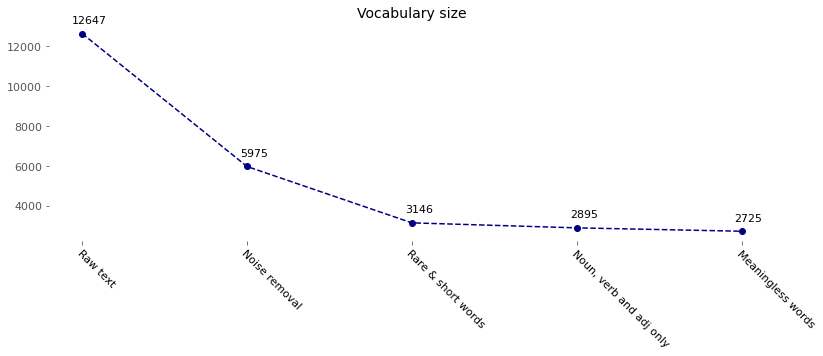

In [ ]:
#Plotting the vocabulary reduction 
plt.figure(figsize=(13,4))
plt.clf()
plt.plot(process,count,'o--',color='navy')

# zip joins x and y coordinates in pairs
for x,y in vocab_size:

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(7,10), # distance from text to points (x,y)
                 ha='center',
                fontsize=11)

plt.title('Vocabulary size',fontsize=14,color='black')
plt.xticks(fontsize=11,rotation=-45, ha="left",rotation_mode="anchor",color='black')
plt.yticks(fontsize=11)
plt.box(False)
plt.show()

The vocabulary size of the raw corpus is 12,647 unique words. This is reduced to 2,724 in the last preprocessing step which yields a total word reduction of 78%. 

The text cleaning of the corpus is now finalized and unimportant words have been removed. The cleaned data is now ready to be used as input for the topic model.

### Topic Modelling

The topic model is implemented to generate topics and label each song with the most appropriate topic. The model determines the optimal number of topics to represent the lyrics corpus based on a measure of coherence [coherence](https://radimrehurek.com/gensim/models/coherencemodel.html). 

It should be noted that the topic model uses random variables and will therefore generate slitly different topics each time the model is implemented. To avoide having different outputs inside this notebook than our homepage presents we have insertede a picture of the output. If you are interested in the code feel free to play around with the variables for the [LDA model](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)("passes","iterations", "chunksize", "random_state","eval_every"). Just be aware that you may get other outputs and other topics.

In [ ]:
#Prepping model inputs
corpus = song['clean2'].values.tolist()
tok_corp= [word_tokenize(sent) for sent in corpus]
lexi = corpora.Dictionary(tok_corp)
corpus = [lexi.doc2bow(d) for d in tok_corp]

plt.figure(figsize=(12, 5))

#Choose n parameter based on coherence measure
coherence_vals = []
for k in range(3,12):
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k,id2word = lexi, eval_every=None,passes=3,
               iterations=10,chunksize=100,random_state=1)

    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=tok_corp, dictionary=lexi, coherence='c_v')   

    coherence_vals.append((k,cm.get_coherence()))

n_topics = [x[0] for x in coherence_vals]
coherence = [x[1] for x in coherence_vals]

plt.plot(n_topics,coherence,color='navy')
plt.scatter(n_topics,coherence,color='navy')
plt.xlabel('Number of Topics',fontsize=11,color='black')
plt.ylabel('Coherence', fontsize=11,color='black')
plt.xticks(n_topics,fontsize=11,color='black')
plt.yticks(fontsize=11,color='black')
plt.title('Chorence for n topics',fontsize=13,color='black')
plt.box(False)

#plt.show()

<img src="cor.png">

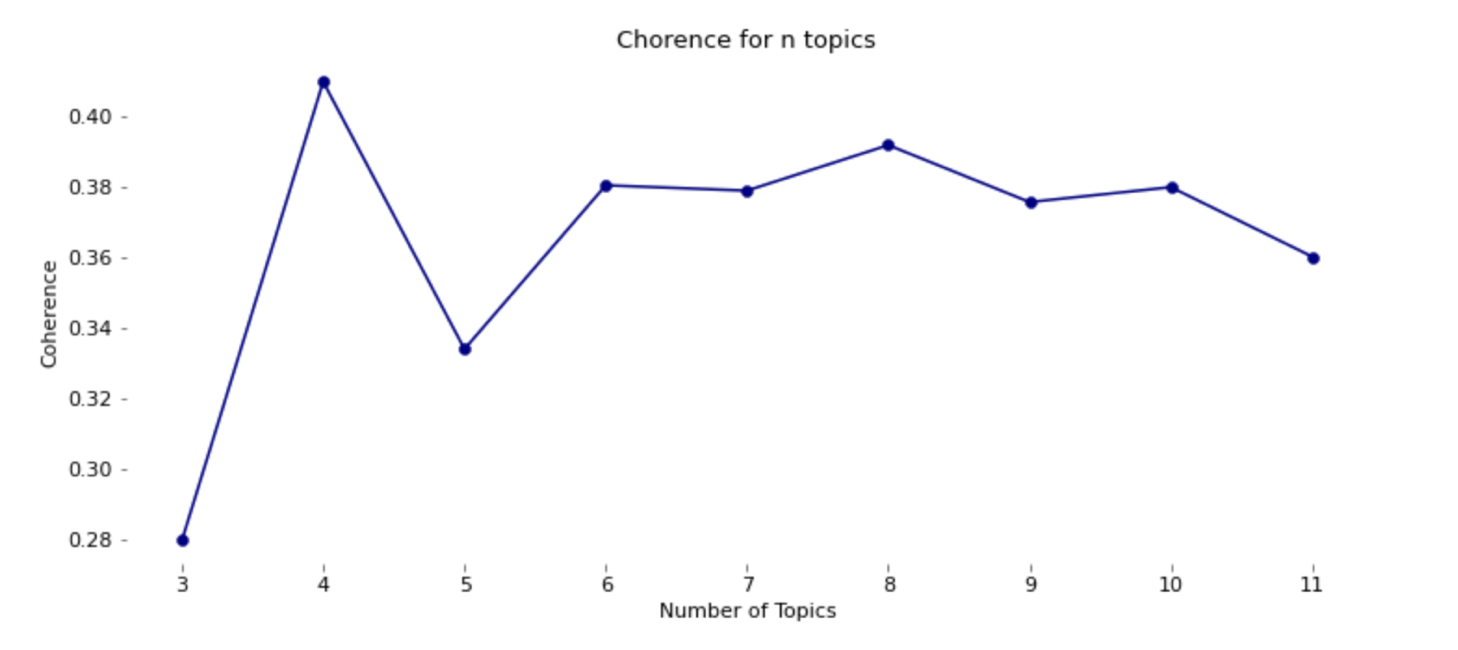!
From the coherence measure the optimal number of topics is n=4

In [ ]:
#Running the LDA model with the optimal number of topics found above
n_sub_topics= 3+coherence.index(max(coherence))
lda = LdaModel(corpus=corpus, id2word=lexi, iterations=10,chunksize=100, passes=3,num_topics=n_sub_topics, 
          update_every=1, alpha='auto', random_state=1,eval_every=None)


In [ ]:
#Finding the topics 
topic_data =  pyLDAvis.gensim_models.prepare(lda, corpus, lexi, mds = 'pcoa')
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.8# Adjust this accordingly based on tuning above
for i in range(1,n_sub_topics+1): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
    topic_df = pd.DataFrame(all_topics).T

In [ ]:
#Display keywords that represents each topic
topic_df

0      1              2          3      4                5  \
Topic 1  nigga  money           talk      bitch   baby             shit   
Topic 2   love   life            try      heart   work           change   
Topic 3  black   hole  intergalactic  planetary   fuck            nigga   
Topic 4   baby   fine          world       mine  cruel  californication   

             6      7     8      9  
Topic 1    hit  ellan   top  shake  
Topic 2   pain  carry  lose   mind  
Topic 3  bitch  sleep  play  cheat  
Topic 4  dream    cry   die  losin

In [ ]:
#assigning each song to topics
topic_names=['Violent gangster','Ups and downs in romance','NSFW','Life experience']
for t in topic_names:
    song[t] = np.zeros(len(song)).astype('int64')
pd.options.mode.chained_assignment = None
for i in range(len(corpus)):
    doc_topics=lda.get_document_topics(corpus[i])
    for topic, prob in doc_topics:
        if prob>=0.4:
            song[topic_names[topic]][i]=1
        else:
            song[topic_names[topic]][i]=0

In [ ]:
#Finding average sentiment score for each topic and the number of songs within each topic
sentiment_score=[]
num_customers=[]
for t in topic_names:
    sentiment_score.append(round(song[song[t]==1]['Compound'].mean(),2))
    num_customers.append(len(song[song[t]==1]))
pd.DataFrame({'Topic':topic_names,'Sentiment score': sentiment_score,'Count': num_customers}).set_index('Topic')



Sentiment score  Count
Topic                                           
Violent gangster                     0.22     46
Ups and downs in romance             0.21     52
Breaking rules                       0.10     62
Life experience                      0.58    101

The table above shows that topic 3 is the most negative topic(lowest sentiment score) and topic 4 is the most positive(highest sentiment score). This alligns with the results from the sentiment analysis that showed mos positive songs within the music industry.

In [ ]:
song[['Violent gangster','Ups and downs in romance','Breaking rules','Life experience','name','lyrics','clean2','title']].sample(n=5,random_state=4)

Violent gangster  Ups and downs in romance  Breaking rules  \
33                  0                         0               0   
213                 1                         0               0   
39                  0                         0               0   
6                   1                         0               0   
101                 0                         0               1   

     Life experience             name  \
33                 1   Nicolle Galyon   
213                0     Beastie Boys   
39                 1     Marty Stuart   
6                  0  Miranda Lambert   
101                0      Nicki Minaj   

                                                lyrics  \
33   [Intro]\nOoh-ooh, ooh-ooh, ooh, ooh\nOoh-ooh, ...   
213  [Chorus]\nIntergalactic planetary, planetary i...   
39   As I look at the valleys down below\nThey are ...   
6    [Intro]\nSting of the needle dropping on a vin...   
101  [Verse 1: Nicki Minaj]\nYo\nI never fucked Way...   

                                                clean2                   title  
33    ocean rain diamond rough cost wall home shine...          All the Things  
213   intergalactic planetary planetary intergalact...           Intergalactic  
39    valley green memory return heart high mountai...  High On A Mountain Top  
6     sting vinyl neon singer hurt good play vice d...                    Vice  
101   wayne fuck drake life fuck sake ménage eat cu...                    Only

In [ ]:
a=song.loc[song['Violent gangster']==1]
a[['name','genre']].groupby(['genre']).count()

name
genre        
Country    11
HipHop     13
Pop         4
RnB         6
Rock       12

In [ ]:
a=song.loc[song['Ups and downs in romance']==1]
a[['name','genre']].groupby(['genre']).count()

name
genre        
Country    13
HipHop      6
Pop        12
RnB         9
Rock       12

In [ ]:
a=song.loc[song['Breaking rules']==1]
a[['name','genre']].groupby(['genre']).count()

name
genre        
Country     8
HipHop     29
Pop         8
RnB        14
Rock        3

In [ ]:
a=song.loc[song['Life experience']==1]
a[['name','genre']].groupby(['genre']).count()

name
genre        
Country    19
HipHop      3
Pop        31
RnB        22
Rock       26

### Model evaluation

To evaluate the topic model performance we have used the below interactive LDA visualizer. With this tool we have examine how the model generated the topics. The chart to the left illustrate how separated the classes are whereas the chart to the right shows the words that reprsents the topics ordered by relevance. The right chart depends on the tunable λ-parameter which is based on TF-IDF. This means that a high value of λ corresponds to importance by term frequency. If the λ-value is decreased there will be given less importance to frequently used words. You can click on the LDA visulizer below and see the words for each topic. Furthermore you can change the λ-value as you please to discover words representing each topic. The LDA visulizer can be seen on our homepage or displayed here by running the code. In order of not having a too large notebook we are not printet it here. 

In [ ]:
pyLDAvis.save_html(topic_data, 'lda.html')

In [ ]:
pyLDAvis.display(topic_data)

From the inteactive LDA visulaizer we discover that the four topic is nicely seperated, indicating that the cleaning process went well and the model has created some good topic to describe the data.

Another way to evaluate the model performance is to look into some lyrics and evaluate if they have been classified correctly. We do this by taking a random sample of three songs and determine if they match the topic class they were put in. 

In [ ]:
song[['Violent gangster','Ups and downs in romance','Breaking rules','Life experience','name','lyrics','clean2','title']].sample(n=5,random_state=4)

Too Good At Goodbyes by Sam Smith- Topic 2:
It is a breakup song about getting used to being dumped and how previous experiences in relationships makes him protect himself. This falls perfectly into the topic "Ups and downs in romance" and the songs is thereby perfectly classified.

That's what I like by Bruno Mars- Topic 4:
This song is about the rich lifestyle with glammer and it is therefore fair to say that it fits the topic "Life experience".

Only by Nicki Minaj- Topic 3:
It is an extremely sexistic song where Minaj defends herself for her sexual life. It is therefore no surprise that the model classifies this as "NSFW" (Not Suitable For Work in the form of very sexual songs).

In [ ]:
#Comments allocated to multiple topics
multiple=len(song.loc[song[topic_names].sum(axis=1)>=2])
multiple

14

In [ ]:
#Comments not allocated to any topic
no_tops=len(song.loc[song[topic_names].sum(axis=1)==0])
no_tops

3

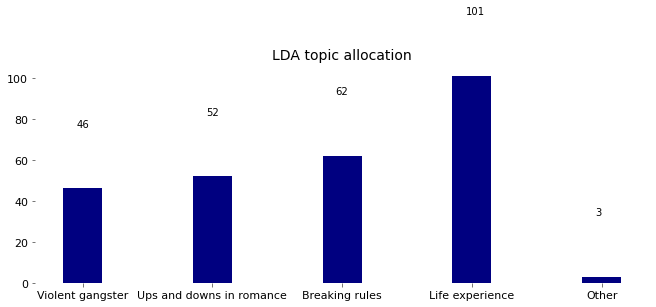

In [ ]:
#Plotting topic distribution
r = np.arange(1,n_sub_topics+2)
y=[]
for t in topic_names:
        y.append(song[t].sum())
y.append(no_tops)
#topic_names.append('No topic')


plt.figure(figsize=(11, 4))
plt.bar(r, y,width=0.3,color='navy')
for i, j in enumerate(y):
    plt.text(i+0.95, j+30, str(j), fontsize=10)
plt.title('LDA topic allocation',fontsize=14,color='black')
plt.xticks(r,topic_names+['Other'],fontsize=11,color='black')
plt.yticks(fontsize=11,color='black')
plt.box(on=None)
#fig.tight_layout(pad=2)
plt.show()

### Topic Modeling per genre

We will now performed topic modeling analysis on each genre at a time to discover possible topics within each genre. We start by calculating the coherence for each genre to discover the optimal number of topics per genre. The code below calculates the cohereance and generates subtopics within each genre. These topics can be seen below.

In [ ]:
d = {}
main_tops=['Rock','HipHop','Country','RnB','Pop']
for topic in main_tops:
    main_topic=topic
    t_data, tok_corp, lexi, corpus = sub_corpus(main_topic) #Calling a function from the function section
    t_data=t_data.reset_index(drop=True)
    
    n_sub_topics                   =choose_n(corpus, lexi, main_topic) #Calling a function from the function section
    
    lda = LdaModel(corpus=corpus, id2word=lexi,  num_topics=n_sub_topics, 
                update_every=1, random_state=1,eval_every=None)
    
    #View topic informations
    topic_data =  pyLDAvis.gensim_models.prepare(lda, corpus, lexi, mds = 'pcoa')
    d['{}_subs'.format(main_topic)]=topic_df(topic_data, n_sub_topics)
    d['{}_visual'.format(main_topic)] = pyLDAvis.display(topic_data)
    
    
    #Topic names to dataframe column 
    topic_words=[]
    for i in range(n_sub_topics):
        tt = lda.get_topic_terms(i,3)
        topic_words.append([(lexi[pair[0]]) for pair in tt])

    sub_top_name=["_".join(word) for word in topic_words]
    sub_top_name=['['+t+']' for t in sub_top_name]

    
    #Add new column for each sub topic
    for t in sub_top_name:
        t_data[t] = np.zeros(len(t_data)).astype('int64')
    pd.options.mode.chained_assignment = None
    for i in range(len(corpus)):
        doc_topics=lda.get_document_topics(corpus[i])
        #print(doc_topics)
        for subtop, prob in doc_topics:
            if prob>=0.4: #threshold for comment to belong to sub topic
                t_data[sub_top_name[subtop]][i]=1
    d['{}_df'.format(main_topic)] = t_data
    
    
    #Sub topic 
    NPS_score=[]
    num_customers=[]
    for t in sub_top_name:
        NPS_score.append(round(t_data[t_data[t]==1]['Compound'].mean(),2))
        num_customers.append(len(t_data[t_data[t]==1]))


    #Total 
    TotalNPS=round(t_data['Compound'].mean(),2)
    TotalComments=len(t_data)
    
    d['{}_NPS'.format(main_topic)] = pd.DataFrame({'Topic':sub_top_name,'NPS indicator': NPS_score,'No. comments': num_customers})
    d['{}_NPS'.format(main_topic)] = d['{}_NPS'.format(main_topic)].append({'Topic':'Total','NPS indicator': TotalNPS, 'No. comments': TotalComments}, ignore_index=True).set_index('Topic')

    
    
    print("\n----- Statistics/sub topic: -----\n")
    print("\n {} Sentiment score. = ".format(main_topic), round(t_data.loc[t_data['genre']==main_topic,'Compound'].mean(),2),'\n')
    for col in sub_top_name:
        print( "{}:\n".format(col) , round(t_data.loc[t_data[col]==1,'Compound'].describe(),2),'\n')

In [ ]:
#You can see the sub topics within each genre by replasing the Rock with another genre
d.get('Rock_subs')

0          1              2       3      4     5  \
Topic 1            try       life           love   heart  carry  lose   
Topic 2  intergalactic  planetary           find  denial  cheat  love   
Topic 3          black       hole          break    shit   find  fall   
Topic 4      planetary      mourn  intergalactic   voice  waste  call   

                       6        7      8         9  
Topic 1  californication     mind  dream     ellan  
Topic 2           change     home   mind      wish  
Topic 3              god  complex   else      cock  
Topic 4            dance    lover  break  mountain

In [ ]:
#You can see the sub topics within each genre by replasing the RnB with another genre
d.get('RnB_NPS')

NPS indicator  No. comments
Topic                                           
[dance_dinero_mean]           0.54             9
[love_hit_ti]                 0.67            15
[work_party_happy]            0.45            11
[baby_love_life]              0.78            18
Total                         0.62            50

When looking at the output for the topics within each genre we discover that the topic model has a hard time detecting  meaningfull topics. This can be due to the fact that we only have 5o songs per genre and that is too few songs for the model to perform topic modeling.

### Frequency term

We want to look at the frequency term and TF-IDF per genre. **TF** is the number of times a term/word $t$ appears in a document $d$ divded by the total number of words in the document. Therefore, every single document also has its own term frequency. With the TF-IDF it ispossible to score the relative importance of words (Maklin, 2019).

In [ ]:
gen = ['Rock','Pop','HipHop','Country','RnB']
dict_test = [] #empty list
for g in gen:
    full_text_tokens=lyrics_to_doc(song.loc[song['genre']==g],['clean2']).split() #Calling a function from the function section
    uniqueWords = set(full_text_tokens).union(set(full_text_tokens)) #create list of unique words in text
    
    numOfWordsA = dict.fromkeys(uniqueWords, 0)
    for word in full_text_tokens: #calculate the number of times a word is mentioned in the tokenized text 
        numOfWordsA[word] += 1
    dict_test.append(numOfWordsA) 
    tc = computeTC(numOfWordsA, full_text_tokens)     #Calling a function from the function section
    values = sorted(tc, key=tc.get, reverse=True)[:5] #get the five words with highest tc
    print(g)
    print(values)
    print(top_n_words(full_text_tokens,5))


Rock
['life', 'black', 'love', 'try', 'mind']
[('life', 39), ('black', 37), ('love', 35), ('try', 32), ('mind', 30)]
Pop
['love', 'baby', 'good', 'life', 'shit']
[('love', 193), ('baby', 85), ('good', 57), ('life', 52), ('shit', 43)]
HipHop
['nigga', 'bitch', 'money', 'fuck', 'love']
[('nigga', 353), ('bitch', 219), ('money', 125), ('fuck', 123), ('shit', 97)]
Country
['love', 'play', 'baby', 'world', 'cruel']
[('love', 79), ('play', 68), ('baby', 36), ('cruel', 35), ('world', 35)]
RnB
['love', 'baby', 'work', 'hit', 'life']
[('love', 183), ('baby', 138), ('work', 99), ('hit', 66), ('life', 46)]


The TF makes sence for ech genre.

We will now calculate the TF-IDF.

In [ ]:

full_text_tokens=lyrics_to_doc(song,['c']).split() #Calling a function from the function section
    
uniqueWords = set(full_text_tokens).union(set(full_text_tokens)) #create list of unique words in text
    
allwords = dict.fromkeys(uniqueWords, 0) 
for word in full_text_tokens: #calculate the number of times a word is mentioned in the tokenized text 
    allwords[word] += 1
#calculates the IDF
idf_result = computeIDF([dict_test[0],dict_test[1], dict_test[2],dict_test[3],dict_test[4]], allwords)   
tc_idf_dict = [] #empty list
for i in range(len(dict_test)): 
    tc_idf=computeTFIDF(dict_test[i],idf_result) #Calling a function from the function section
    tc_idf_dict.append(tc_idf)
    values_TFIDF = sorted(tc_idf, key=tc_idf.get, reverse=True)[:5] #get the five words with highest tf-idf
    print(gen[i])
    print(values_TFIDF)

Rock
['intergalactic', 'planetary', 'believer', 'californication', 'ellan']
Pop
['rocka', 'poker', 'cruel', 'hollaback', 'mah']
HipHop
['nigga', 'bitch', 'badder', 'ye', 'curl']
Country
['cruel', 'country', 'misunderstood', 'georgia', 'bayou']
RnB
['wishin', 'dinero', 'ti', 'hee', 'button']


We discover that the TF-IDF gives way too specific words and the output is not suiatable. The topic mdodel do use TF.IDF to calculate the keywords for each topic but in the topic model we can adjust the lambda value. As you can see in the code where we implemented the topic model we used a high lambda value which assignes more importans to TF.

### Topic Modeling conclusion

This study provides an understanding of what the words we listen to is all about. The topic model detected different topics within songs and examines which topics has the higest/lowest sentiment score indicating the emotional influence of the topic. Furthermore the results shows which topic has the highest reprsentstion and what genre the topics occurs mostly in. In the end there were no doubt that the largest topic is "Life experience" which makes sence since this topic is a very broad topic including many kind of songs. Furthermore it was as expected thar HipHop accounted for almost half of the songs in the topic "NSFW" (Not Suitable For Work) which were the most negative topic. The analysis therefore supports manys assumptions that Hip Hop is an aggresive genre.

With this topic part of the study you are provided with a tool to understand what kind of music you should chose depending on the topic you want to listen to and what kind of emotinal tone the topic has.

### WorldClouds

An investigation of different wordclouds has been carried out.
Wordclouds for topic classes, wordclouds for genres and wordclouds for sentiment groups. 

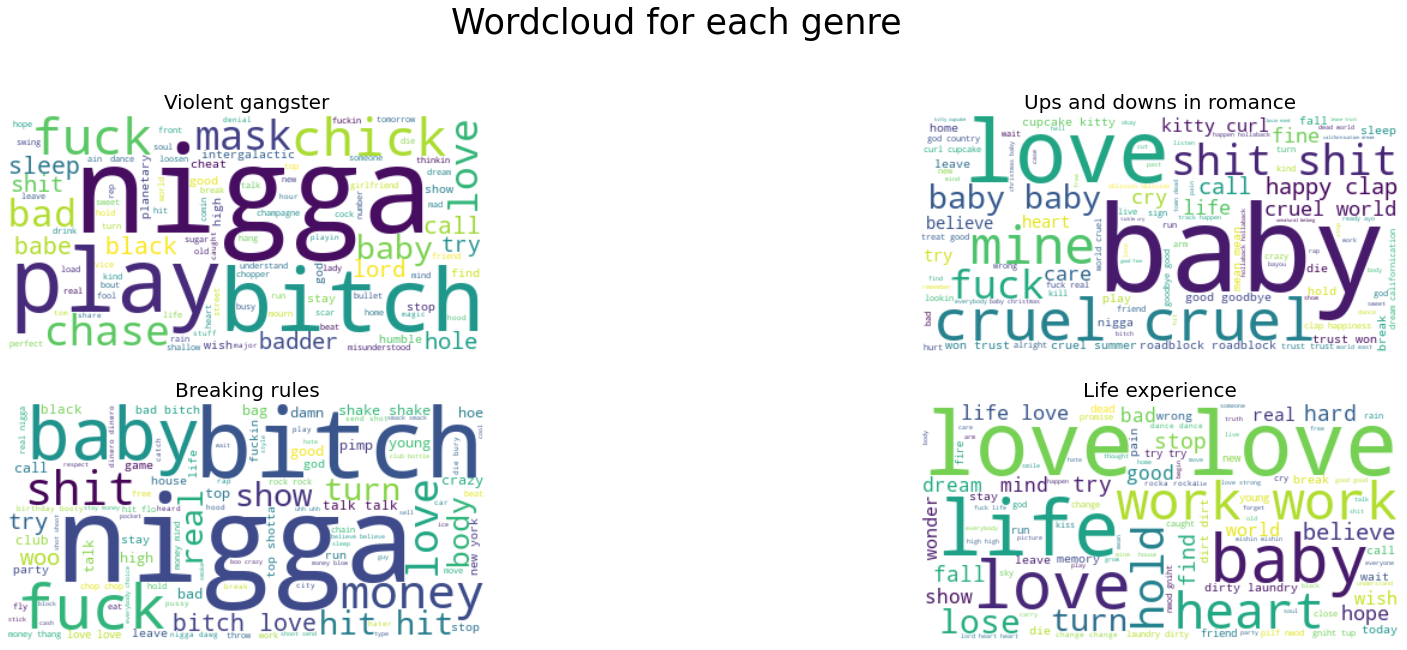

In [ ]:
from PIL import Image

plt.rcParams['figure.figsize'] = [30, 15]
fig = plt.figure()

ax1 = fig.add_subplot(3,2,1)
text = ' '.join(song.loc[song['Violent gangster']==1]['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white", collocations=False,  contour_width=3, contour_color='black').generate(text)
ax1.imshow(fig_wordcloud, interpolation="bilinear")  
ax1.axis('off')
#ax1.title("Pop", fontsize=20)
ax1.set_title('Violent gangster', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax2 = fig.add_subplot(3,2,2)
text = ' '.join(song.loc[song['Ups and downs in romance']==1]['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax2.imshow(fig_wordcloud, interpolation="bilinear")  
ax2.axis('off')
#ax1.title("Pop", fontsize=20)
ax2.set_title('Ups and downs in romance', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax3 = fig.add_subplot(3,2,3)
text = ' '.join(song.loc[song['NSFW']==1]['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax3.imshow(fig_wordcloud, interpolation="bilinear")  
ax3.axis('off')
#ax1.title("Pop", fontsize=20)
ax3.set_title('NSFW', fontdict={'fontsize': 20, 'fontweight': 'medium'})

ax4 = fig.add_subplot(3,2,4)
text = ' '.join(song.loc[song['Life experience']==1]['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax4.imshow(fig_wordcloud, interpolation="bilinear")  
ax4.axis('off')
#ax1.title("Pop", fontsize=20)
ax4.set_title('Life experience', fontdict={'fontsize': 20, 'fontweight': 'medium'})



fig.suptitle('Wordcloud for each genre', fontsize=35)
plt.show()

From the wordclouds of the topics it is possible to see that violent gangster and NSFW has wordsclouds that are alike. This makes sence due to the fact that they both have many hiohop songs. 

The same goes for the two other topics, ups and downs in romance and life experience. These two topics has wordclouds that contains many of the same words. 

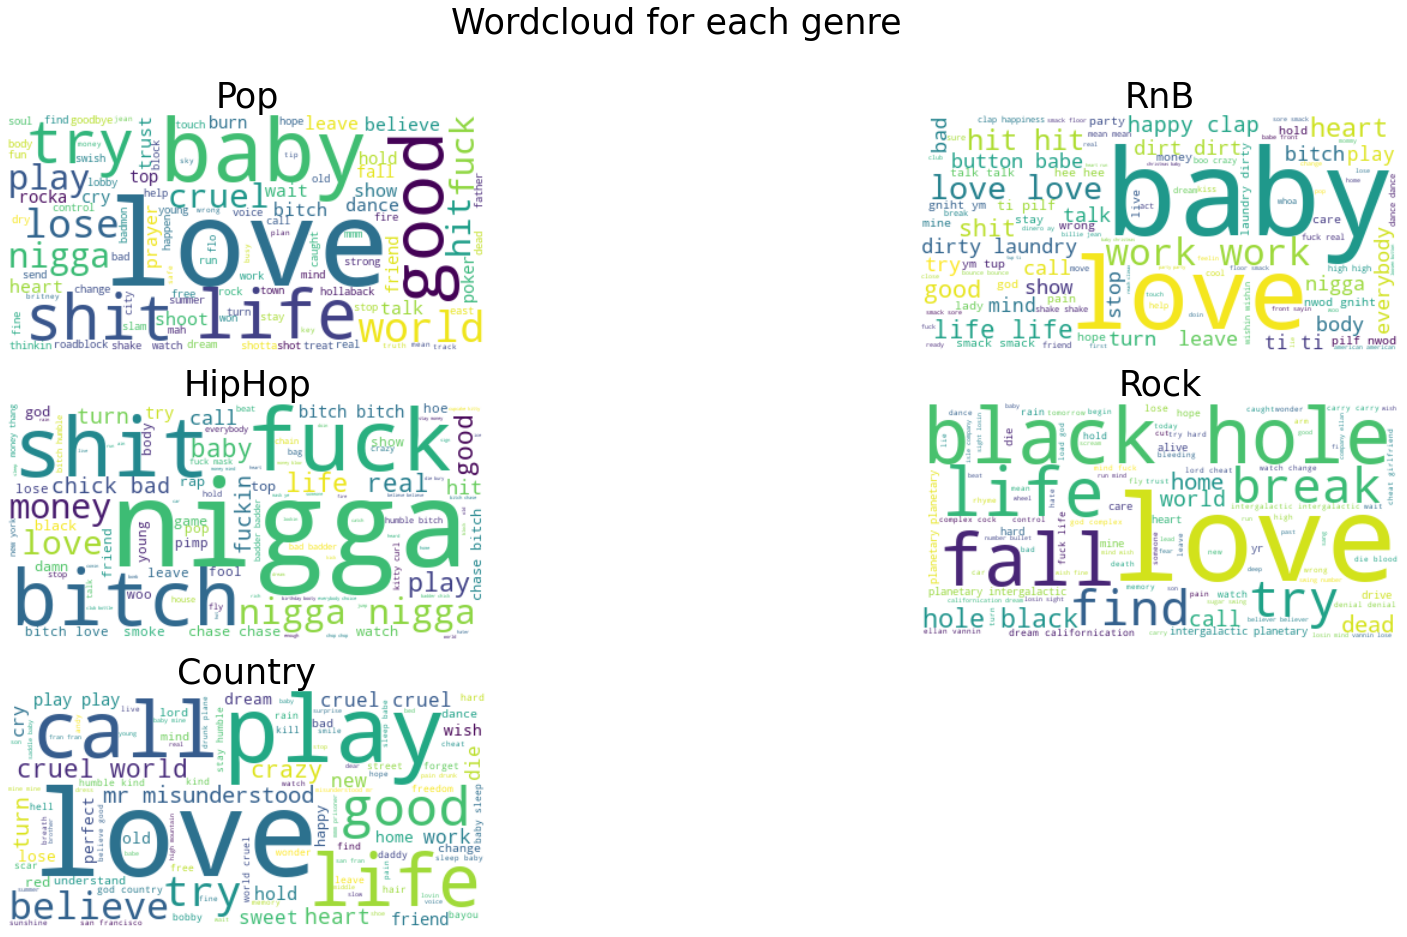

In [ ]:
from PIL import Image

plt.rcParams['figure.figsize'] = [30, 15]
fig = plt.figure()

ax1 = fig.add_subplot(3,2,1)
text = ' '.join(song[song.genre=='Pop']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white", collocations=False,  contour_width=3, contour_color='black').generate(text)
ax1.imshow(fig_wordcloud, interpolation="bilinear")  
ax1.axis('off')
#ax1.title("Pop", fontsize=20)
ax1.set_title('Pop', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax2 = fig.add_subplot(3,2,2)
text = ' '.join(song[song.genre=='RnB']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax2.imshow(fig_wordcloud, interpolation="bilinear")  
ax2.axis('off')
#ax1.title("Pop", fontsize=20)
ax2.set_title('RnB', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax3 = fig.add_subplot(3,2,3)
text = ' '.join(song[song.genre=='HipHop']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax3.imshow(fig_wordcloud, interpolation="bilinear")  
ax3.axis('off')
#ax1.title("Pop", fontsize=20)
ax3.set_title('HipHop', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax4 = fig.add_subplot(3,2,4)
text = ' '.join(song[song.genre=='Rock']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax4.imshow(fig_wordcloud, interpolation="bilinear")  
ax4.axis('off')
#ax1.title("Pop", fontsize=20)
ax4.set_title('Rock', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax5 = fig.add_subplot(3,2,5)
text = ' '.join(song[song.genre=='Country']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax5.imshow(fig_wordcloud, interpolation="bilinear")  
ax5.axis('off')
#ax1.title("Pop", fontsize=20)
ax5.set_title('Country', fontdict={'fontsize': 35, 'fontweight': 'medium'})

fig.suptitle('Wordcloud for each genre', fontsize=35)
plt.show()

From the wordclouds it is clear to see that Pop and RnB are very much alike with words like "love" and "baby" being with signitifact importance. From our network analysis we saw the same, that many Pop artist also make RnB music and vise verse. These two genre are thereby close connected. The words representing HipHop is word there also described the topic "Violent gangster" and "NSFW". This is as expected since HipHop accounted for the largest proportion of each of the topics (respectively 26% and 48%). When it comes to the last two genres, Rock and Country, the words is more even distributed between the topics which relates to their distributions in the topic modeling analysis. Furthermore Country has very few negatively charged words which fits the results from the sentiment analysis namely that country is the genre with the lowest proportion of negative messages

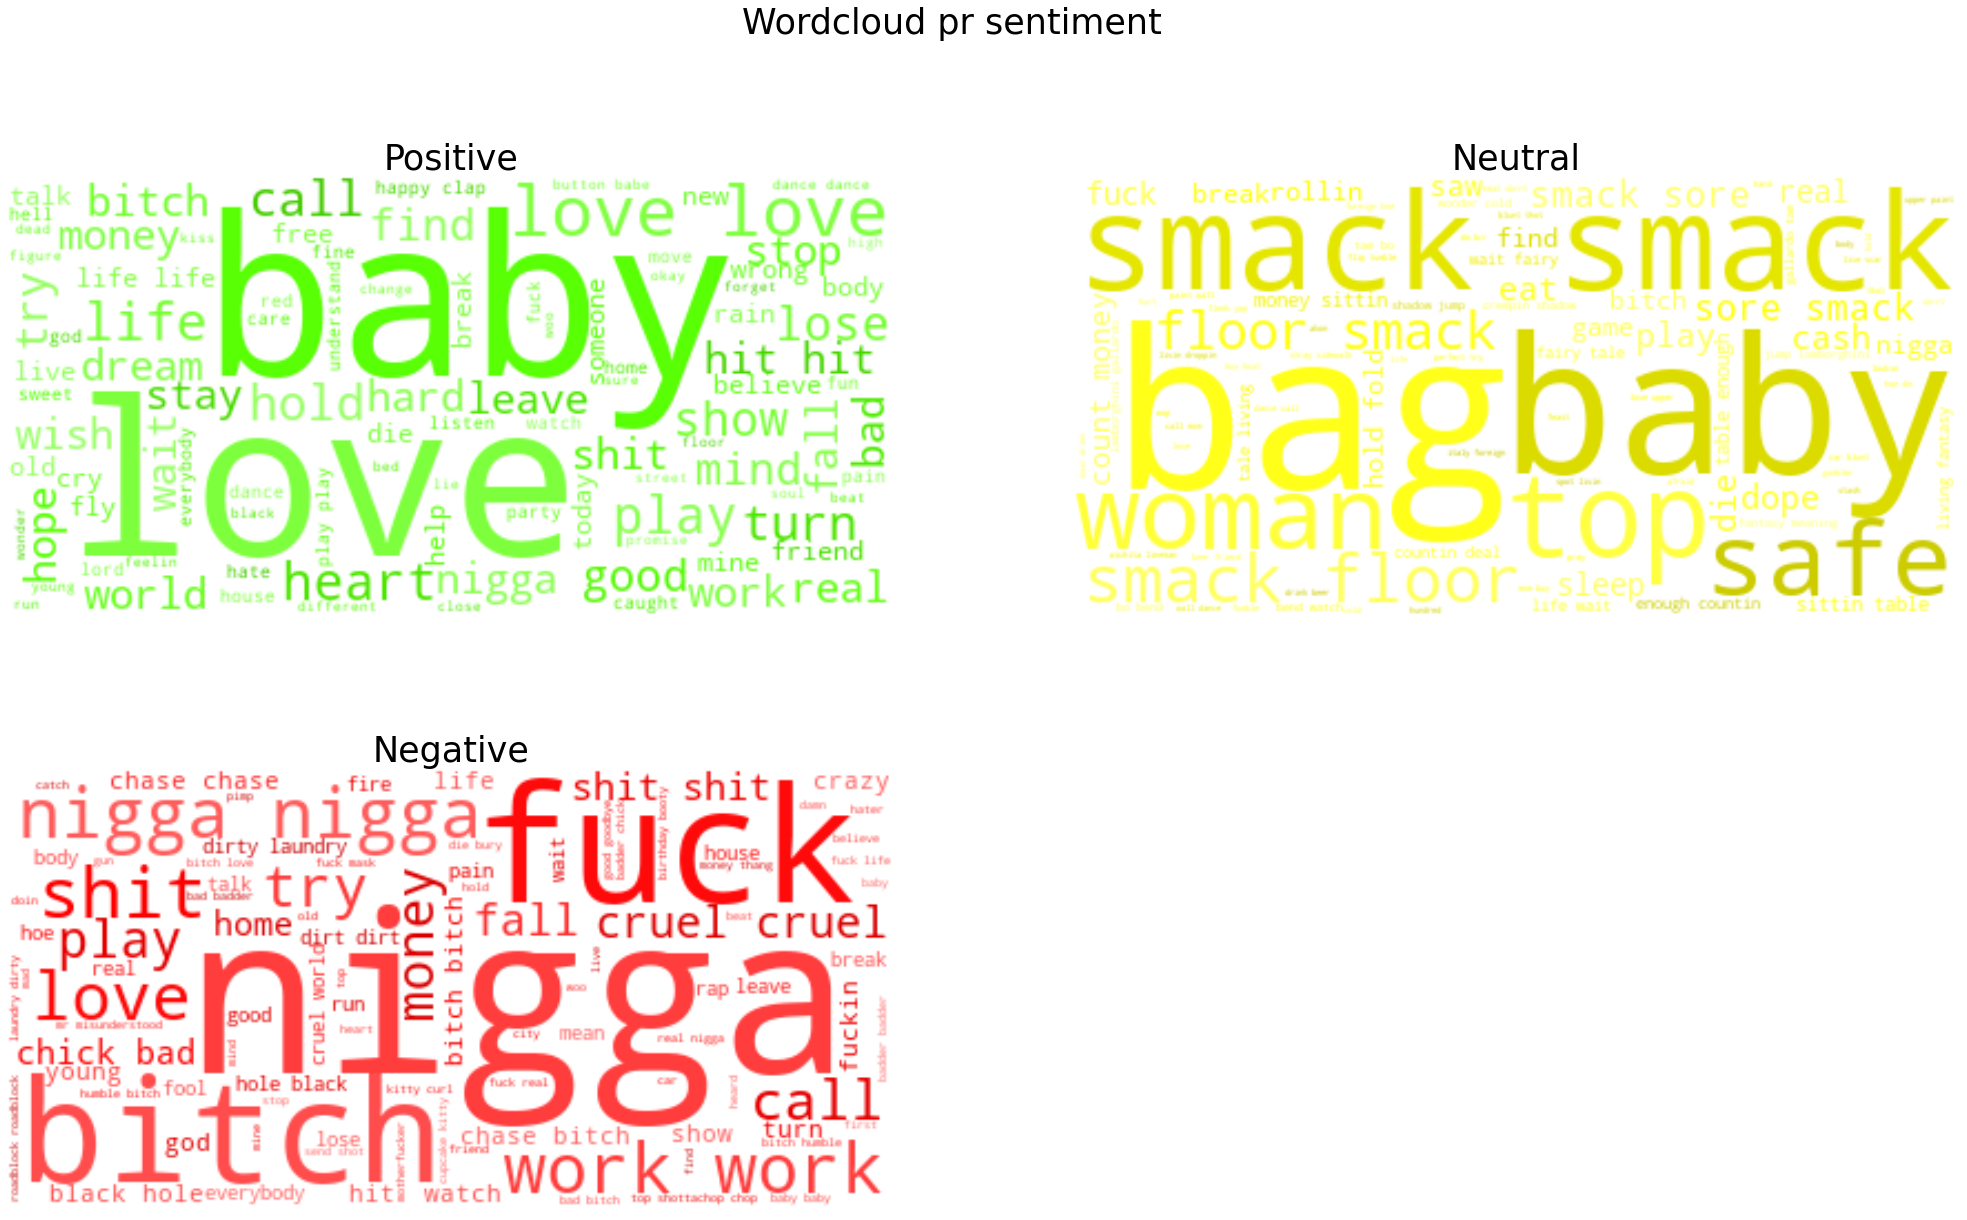

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(40, 70)

def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(60, 100%%, %d%%)" % random.randint(40, 70)

def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(40, 70)




plt.rcParams['figure.figsize'] = [35, 20]
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
text = ' '.join(song[song.Sentiment=='Positive']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax1.imshow(fig_wordcloud.recolor(color_func=green_func, random_state=3),
           interpolation="bilinear") 
ax1.axis('off')
#ax1.title("Pop", fontsize=20)
ax1.set_title('Positive', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax2 = fig.add_subplot(2,2,2)
text = ' '.join(song[song.Sentiment=='Neutral']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax2.imshow(fig_wordcloud.recolor(color_func=yellow_func, random_state=3),
           interpolation="bilinear")  
ax2.axis('off')
#ax1.title("Pop", fontsize=20)
ax2.set_title('Neutral', fontdict={'fontsize': 35, 'fontweight': 'medium'})

ax3 = fig.add_subplot(2,2,3)
text = ' '.join(song[song.Sentiment=='Negative']['clean2'].astype(str).tolist())
    
fig_wordcloud = wordcloud.WordCloud(stopwords = STOPWORDS,max_font_size=100, max_words=100, background_color="white").generate(text)
ax3.imshow(fig_wordcloud.recolor(color_func=red_func, random_state=3),
           interpolation="bilinear")  
ax3.axis('off')
#ax1.title("Pop", fontsize=20)
ax3.set_title('Negative', fontdict={'fontsize': 35, 'fontweight': 'medium'})

fig.suptitle('Wordcloud pr sentiment', fontsize=35)
plt.show()

It makes perfectly sence that words like "love", "baby", "heart" and "thank" is a part of the positive wordcloud. These are words that we normally assosiate with a positive message.

As expected the wordcloud for the neutral sentiment class contains words in oppisite emotional directions and quite a lot of words with no sentiment orintations.

Finally the wordcloud for the negative sentiment contains words like "fuck", "bitch" and "shit" which clearly indicate a negative message. Furthermore the wordcloud contains the word "nigga" which is not a negative word but a word many hihop artist uses in their songs. The hiphoppers songs has often a negative message causing their lyrics to be a part of the negative wordclouds ansd thereby also the word "nigga".

<a id='part6'></a>
# Part 6: Discussion and Conclusion

The goal of this study was to investigate different artists and compare different genres to achive a deeper insight into the music industry. 
The study began with a thorough data collection from different Wikipedia pages, followed by data cleaning and preprocessing. In the section of basic statistics it quickly became clear that Hip Hop (and country) was the most represented genre in the data. The network was build and a backbone analysis was carried out. The backbone used for further analysis only reinforced the representation of the Hip Hop genre, as its proportion of the total network increased. For future work one could work towards achieving a more equal genre distribution. With a more equal genre distribution one might would have discovered new patterns in the data which possibly would be reflected in the partitioning of communities. However the network analysis showed reasonable results despite the unequal genre distribution.  

Prior to the backbone analysis the Giant Connected Component (GCC) was plotted. Already in this drawing of the network it was indicated how genres clearly was separated, as the different genres tended to cluster together. However, it was decided to perform a backbone analysis as the network consisted of a lot of insignificant edges and nodes, which only would make the analysis and inspection of the network more difficult and blurred. A weighted network was needed in order to perform the backbone analysis. The weighting was based on the amount of links in between two artists' Wikipedia pages. However, the weighting could have been chosen in several other ways, e.g. by including the amount of followers. By looking at the Wikipedia pages the network tends to favor the more popular artists, due to the fact that they often have more text on their pages. For future work it would be interesting to define the links by collaborations. However this also have its downsides as it might favor some artists in other ways.  

The partitioning into communities was based on the GCC of the backbone network. The partitioning seemed reasonable in terms of amount and modularity score. Looking further into the communities only reinforced a good reasoning behind the networks. 38 communities was found and at a first glance it also looked somewhat strange that several of the communities was highly dominated by e.g. the country genre. One prior to the analysis one could think that there would just bust one big commuity for each genre. However, when looking at different attributes such as starting year and origin it made more sense. The Louvain algorithm succeeded in partitioning different groups of artists within the same genre, such that older artists were in one, while newer artists were in another. Nonetheless other methods could have been used for community detection, which might could have revealed other insights. Hence, for further work it could be interesting to combine the Louvain algorithm with other methods.   

Next up was the sentiment analysis. Overall the model performed very well and by using Vader the model succeeded in understanding intensity, acronyms and slang within the lyrics. However, the sentiment analysis showed a very low proportion of neutral songs. This might be due to the often extreme emotions in songs, such that the artists really gets its message out. On the other side it might also be due the way that Vader is trained. Vader is trained on social media data, which of course its performance on different texts. This gives rise to opportunities of training models on music lyrics instead, which might increase the performance when tested on the songs in the dataset.


From the topic modeling analysis it was possible to detect topics and classify the songs by these topics. Many people have assumptions of different genres and what they are about. It was possible with the topic analysis to support some of these assumptions, indicating clear pattherns in the music industry. For a more detailed topic analysis it would improve the model if it was trained on a larger dataset. A further investigation into the topics could also be carried out by additional text cleaning for instance replacing synonyms.   




<a id='part7'></a>
# Part 7: Contributions


| Name | Study ID | Contribution |
| --- | --- |--- |
| Cecilie Kosack | s184304| Network Analysis, Basic Stats and project video |
| Amanda Sommer | s184303| Sentiment Analysis, Topic Modelling and homepage |
| Julius Rasmussen | s184288|  Network Analysis, Basic Stats and homepage |

<a id='part8'></a>
# References

* Alstott J, Bullmore E, Plenz D, 2014, *powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions*, seen 1st Nov. 2021,  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777

* Barabási, A., 2015, *Network Science*, online edition, seen 30th Oct. 2021, http://networksciencebook.com/chapter/9#testing

* cjhutto, *Vader Sentiment*, https://github.com/cjhutto/vaderSentiment. Accessed: seen 25th Nov. 2021

* Google for Education  - Python, *Python Regular Expressions*, seen 19th Nov. 2021, https://developers.google.com/edu/python/regular-expressions

* Guillaume, J., Blondel, V. and Renaud, L., 2008, *Louvain method: Finding communities in large networks*, seen 30th Oct. 2021, https://sites.google.com/site/findcommunities/newversion.

* Hutto, C.J., 2021 *VADER-Sentiment-Analysis* seen 30th Oct. 2021, https://github.com/cjhutto/vaderSentiment#code-examples

* Maklin, C., 2019 *TF IDF | TFIDF Python Example*, seen 30th Oct. 2021, https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

* Radim Rehurek, *Gensim - Topic coherence pipeline*, https://radimrehurek.com/gensim/models/coherencemodel.html. seen 20th Nov. 2021

* Serrano,  M. A., et al., 2009, *Extracting the multiscale backbone of complex weighted networks*

* Thushan Ganegedara, Towards Data Science, *Intuitive Guide to Latent Dirichlet Allocation*, https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158.Accessed: seen 25th Nov. 2021









<a id='part9'></a>
# Functions

In [ ]:
#The following function decodes a string by replacing Unicode Characters with a new specificed string
def replaceunicode(strInput):
        strInput = strInput.replace(u"\\u00c0", "À")
        strInput = strInput.replace(u"\\u00c1", "Á")
        strInput = strInput.replace(u"\\u00c2", "Â")
        strInput = strInput.replace(u"\\u00c3", "Ã")
        strInput = strInput.replace(u"\\u00c4", "Ä")
        strInput = strInput.replace(u"\\u00c5", "Å")
        strInput = strInput.replace(u"\\u00c6", "Æ")
        strInput = strInput.replace(u"\\u00c7", "Ç")
        strInput = strInput.replace(u"\\u00c8", "È")
        strInput = strInput.replace(u"\\u00c9", "É")
        strInput = strInput.replace(u"\\u00ca", "Ê")
        strInput = strInput.replace(u"\\u00cb", "Ë")
        strInput = strInput.replace(u"\\u00cc", "Ì")
        strInput = strInput.replace(u"\\u00cd", "Í")
        strInput = strInput.replace(u"\\u00ce", "Î")
        strInput = strInput.replace(u"\\u00cf", "Ï")
        strInput = strInput.replace(u"\\u00d1", "Ñ")
        strInput = strInput.replace(u"\\u00d2", "Ò")
        strInput = strInput.replace(u"\\u00d3", "Ó")
        strInput = strInput.replace(u"\\u00d4", "Ô")
        strInput = strInput.replace(u"\\u00d5", "Õ")
        strInput = strInput.replace(u"\\u00d6", "Ö")
        strInput = strInput.replace(u"\\u00d8", "Ø")
        strInput = strInput.replace(u"\\u00d9", "Ù")
        strInput = strInput.replace(u"\\u00da", "Ú")
        strInput = strInput.replace(u"\\u00db", "Û")
        strInput = strInput.replace(u"\\u00dc", "Ü")
        strInput = strInput.replace(u"\\u00dd", "Ý")
        strInput = strInput.replace(u"\\u00df", "ß")
        strInput = strInput.replace(u"\\u00e0", "à")
        strInput = strInput.replace(u"\\u00e1", "á")
        strInput = strInput.replace(u"\\u00e2", "â")
        strInput = strInput.replace(u"\\u00e3", "ã")
        strInput = strInput.replace(u"\\u00e4", "ä")
        strInput = strInput.replace(u"\\u00e5", "å")
        strInput = strInput.replace(u"\\u00e6", "æ")
        strInput = strInput.replace(u"\\u00e7", "ç")
        strInput = strInput.replace(u"\\u00e8", "è")
        strInput = strInput.replace(u"\\u00e9", "é")
        strInput = strInput.replace(u"\\u00ea", "ê")
        strInput = strInput.replace(u"\\u00eb", "ë")
        strInput = strInput.replace(u"\\u00ec", "ì")
        strInput = strInput.replace(u"\\u00ed", "í")
        strInput = strInput.replace(u"\\u00ee", "î")
        strInput = strInput.replace(u"\\u00ef", "ï")
        strInput = strInput.replace(u"\\u00f0", "ð")
        strInput = strInput.replace(u"\\u00f1", "ñ")
        strInput = strInput.replace(u"\\u00f2", "ò")
        strInput = strInput.replace(u"\\u00f3", "ó")
        strInput = strInput.replace(u"\\u00f4", "ô")
        strInput = strInput.replace(u"\\u00f5", "õ")
        strInput = strInput.replace(u"\\u00f6", "ö")
        strInput = strInput.replace(u"\\u00f8", "ø")
        strInput = strInput.replace(u"\\u00f9", "ù")
        strInput = strInput.replace(u"\\u00fa", "ú")
        strInput = strInput.replace(u"\\u00fb", "û")
        strInput = strInput.replace(u"\\u00fc", "ü")
        strInput = strInput.replace(u"\\u00fd", "ý")
        strInput = strInput.replace(u"\\u00ff", "ÿ")

        strOutput = strInput
        return (strOutput)

In [ ]:
def plot_attribute_dist(values, counts, html):
    plot_df = pd.DataFrame({'Value':values,'Count': counts})
    plot_df = plot_df.sort_values('Count', ascending=False)
    
    fig = px.bar(plot_df, x='Value', y='Count', text='Count')
    fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',hovermode="x unified",
                      plot_bgcolor='rgba(0,0,0,0)',
                      yaxis_title="Count",
                      xaxis_title="")
    fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                     showgrid=True, gridwidth=1, gridcolor='lightgrey')

    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                      marker_line_width=1.5)
    fig.write_html(html)
    fig.show()
    

In [ ]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=500.0,  # Tolerance
                        barnesHutOptimize=False,
                        barnesHutTheta=2,
                        #multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=10,
                        strongGravityMode=False,
                        gravity=100,

                        # Log
                        verbose=True)

In [ ]:
# Function from the folllowing github page: 
# https://github.com/aekpalakorn/python-backbone-network/blob/master/backbone.py

def disparity_filter(G, weight='weight'):
    ''' Compute significance scores (alpha) for weighted edges in G as defined in Serrano et al. 2009
        Args
            G: Weighted NetworkX graph
        Returns
            Weighted graph with a significance score (alpha) assigned to each edge
        References
            M. A. Serrano et al. (2009) Extracting the Multiscale backbone of complex weighted networks. PNAS, 106:16, pp. 6483-6488.
    '''
    
    if nx.is_directed(G): #directed case    
        N = nx.DiGraph()
        for u in G:
            
            k_out = G.out_degree(u)
            k_in = G.in_degree(u)
            
            if k_out > 1:
                sum_w_out = sum(np.absolute(G[u][v][weight]) for v in list(G.successors(u)))
                for v in list(G.successors(u)):
                    w = G[u][v][weight]
                    p_ij_out = float(np.absolute(w))/sum_w_out
                    alpha_ij_out = 1 - (k_out-1) * integrate.quad(lambda x: (1-x)**(k_out-2), 0, p_ij_out)[0]
                    N.add_edge(u, v, weight = w, alpha_out=float('%.4f' % alpha_ij_out))
                    
            elif k_out == 1 and G.in_degree(list(G.successors(u))[0]) == 1:
                #we need to keep the connection as it is the only way to maintain the connectivity of the network
                v = list(G.successors(u))[0]
                w = G[u][v][weight]
                N.add_edge(u, v, weight = w, alpha_out=0., alpha_in=0.)
                #there is no need to do the same for the k_in, since the link is built already from the tail
            
            if k_in > 1:
                sum_w_in = sum(np.absolute(G[v][u][weight]) for v in list(G.predecessors(u)))
                for v in list(G.predecessors(u)):
                    w = G[v][u][weight]
                    p_ij_in = float(np.absolute(w))/sum_w_in
                    alpha_ij_in = 1 - (k_in-1) * integrate.quad(lambda x: (1-x)**(k_in-2), 0, p_ij_in)[0]
                    N.add_edge(v, u, weight = w, alpha_in=float('%.4f' % alpha_ij_in))
        return N
    
    else: #undirected case
        B = nx.Graph()
        for u in G:
            k = len(G[u])
            if k > 1:
                sum_w = sum(np.absolute(G[u][v][weight]) for v in G[u])
                for v in G[u]:
                    w = G[u][v][weight]
                    p_ij = float(np.absolute(w))/sum_w
                    alpha_ij = 1 - (k-1) * integrate.quad(lambda x: (1-x)**(k-2), 0, p_ij)[0]
                    B.add_edge(u, v, weight = w, alpha=float('%.4f' % alpha_ij))
        return B            

In [ ]:
#This code will be used to calculate corpus and vocabulary size in the topic modeling part
vocab_size = [] #Saving the vocabolary size reduction

from functools import reduce
def lyrics_to_lists(df, columns):
    #https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram
    slist = [df[x].astype(str) for x in columns]
    client_comments=reduce(lambda x, y: x + ' ' + y, slist[1:], slist[0])
    return client_comments


def lyrics_to_doc(df, columns):
    client_comments = lyrics_to_lists(df,columns)
    return client_comments.str.cat(sep=' ')


def top_n_words(split_doc,n):
    # Pass the split_it list to instance of Counter class.
    from collections import Counter
    Counter = Counter(split_doc) 

    # most_common() produces k frequently encountered  
    most_occur = Counter.most_common(n)
    return most_occur

In [ ]:
#This code is used in the topic modeling part when cleaning the data
contractions = {"ain't": "am not",
                "'cause": "because",
                "could've": "could have",
                "didnt": "did not",
                "hadnt": "had not",
                "haven't": "have not",
                "havent": "have not",
                "how'd": "how did",
                "how'll": "how will",
                "it'd": "it would",
                "it'll": "it will",
                "mayn't": "may not",
                "might've": "might have",
                "mightn't": "might not",
                "must've": "must have",
                "mustn't": "must not",
                "needn't": "need not",
                "oughtn't": "ought not",
                "shan't": "shall not",
                "should've": "should have",
                "shouldnt": "should not",
                "that'd": "that would",
                "there'd": "there would",
                "theres": "there is",
                "wasn't": "was not",
                "wasnt": "was not",
                " u ": " you ",
                " ur ": " your ",
                " n ": " and ",
                " futures ": " futures_product ",
                " options ": " option_product "} 

In [ ]:
#This code is used in the topic modelig part when cleaning the data(noice cleaning)

# Function to lemmatize with POS Tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    if tag.startswith('J'):
        return tag_dict.get(tag,wordnet.ADJ)
    elif tag.startswith('V'):
        return tag_dict.get(tag,wordnet.VERB)
    elif tag.startswith('N'):
        return tag_dict.get(tag,wordnet.NOUN)
    elif tag.startswith('R'):
        return tag_dict.get(tag,wordnet.ADV)
    else:
        # As default pos in lemmatization is Noun
        return tag_dict.get(tag,wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
stemmer    = PorterStemmer()
stop_words =get_stopwords('en')
stop_words.extend(['use','say','know','get','done','many','some','think','see','rather','lot','want',
                   'seem','need','even','right','also','take','come','can','dont','cant','please','let','i'])


# Function to add common words to stop words
new_stopwords = []
def rem_stopwords(text):
    #stop_words.extend(new_stopwords)
    text= " ".join([word for word in text.split() if word not in stop_words])
    return text
    

pattern2 = '(\[.*?\])'
def remove_noise(text):
    #(0) Remove [Intro] [Verse 1] ...
    remove_pat = re.findall(pattern2, text)
    for i in remove_pat:
        text= text.replace(i,' ')
    
    
    #(1) Strip and lowercase sentence
    text = text.strip()
    text= "".join([word.lower() for word in text])
    
    #(2) Contraction conversion
    for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
    
    #(3) Remove stopwords
    text = rem_stopwords(text)
    
    #(4) Remove punctuation
    text=text.replace('.','')
    text=text.replace(',','')
    text=text.replace('-','  ')
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub('[0-9]+', '', text)
      
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    
    #(5) Lemmatize songs with POS tags
    text= " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]) #nltk.word_tokenize(text)
    
    
    #(6) Adding one extra whitespace at the end of each song. 
    #    This should handle issues with necessary corrections of words in the end of strings 
    string_length=len(text)+2
    text=text.center(string_length)
    

    
    return text



In [ ]:
#Function used in topic modeling for cleaning the data (remove rare and short words)
def remove_rare_short(text):
    #use list named 'rare'
    text= " ".join([word for word in text.split() if word not in rare])
    text= " ".join([word for word in text.split() if len(word) >= 2])
    return text

In [ ]:
#Function used in topic modeling for cleaning data
# Filter for only nouns, verb and adj
def noun_verb_only(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    pos_comment = nltk.pos_tag([word for word in tokens])
    filtered = [word[0] for word in pos_comment if word[1] in ['NN','JJ','VB','VBD','VBG','VBP']]
    
    return " ".join(filtered)

In [ ]:
# Functions used for the topic modeling per genres
from stopwords import get_stopwords
import string
stop_words = get_stopwords('en')

# Function to add common words to stop words
new_stopwords = []
def rem_stopwords(text):
    #stop_words.extend(new_stopwords)
    text= " ".join([word for word in text.split() if word not in stop_words])
    return text

def add_whitespace(text):
    text = text.strip()
    text= "".join([word for word in text])
     
    #Adding one extra whitespace at the end of each comment.
    string_length=len(text)+2
    text=text.center(string_length)
    return text      

def sub_corpus(main_topic):
    #Using only corpus contained in the main topic, while excluding plain words in the topic
    t_data = song.loc[song['genre']==main_topic]

        
    #The dictionary and corpus is created to use as input to the LDA model.
    corpus = t_data.loc[t_data['genre']==main_topic,'clean2'].values.tolist()
    tok_corp= [word_tokenize(sent) for sent in corpus]
    
    lexi = corpora.Dictionary(tok_corp)
    corpus = [lexi.doc2bow(d) for d in tok_corp]
    return t_data,tok_corp,lexi,corpus


def choose_n(corpus, dictionary, main_topic):
    coherence_vals = []
    for k in range(2,6):
        Lda = gensim.models.ldamodel.LdaModel
        ldamodel = Lda(corpus, num_topics=k, \
                   id2word = dictionary, eval_every=None,
                      random_state=1)

        cm = gensim.models.coherencemodel.CoherenceModel(\
             model=ldamodel, texts=tok_corp,\
             dictionary=dictionary, coherence='c_v')   

        coherence_vals.append((k,cm.get_coherence()))
        
    n_topics = [x[0] for x in coherence_vals]
    coherence = [x[1] for x in coherence_vals]
    
    n=2+coherence.index(max(coherence))
    
    print('\n-------------- Sub topics within {} --------------'.format(main_topic) )
    plt.figure(figsize=(6,2))
    plt.plot(n_topics,coherence,color='navy')
    plt.scatter(n_topics,coherence,color='navy')
    plt.title('{}'.format(main_topic),fontsize=13)
    plt.xlabel('Number of Topics', fontsize=11)
    plt.ylabel('Coherence', fontsize=11)
    plt.xticks(n_topics,fontsize=11)
    plt.yticks(fontsize=11)
    plt.box(False)
    plt.savefig('{}_coherence.jpg'.format(main_topic))
    plt.show()
    
    print(main_topic,': modeling n={} sub topics\n '.format(n))
    
    return n


def get_sub_topics(lda, main_topic, n):
    #Generate sub topics within main topics Platform, Product, Price, Service or Other
    return '{} topics'.format(main_topic),lda.print_topics(n)


def topic_visual(lda, courpus):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary=lda.id2word)
    return vis


def topic_df(topic_data, n):
    #Create dataframe containing sup topic words
    
    all_topics = {}
    num_terms = 10 # Adjust number of words to represent each topic
    lambd = 0.8# Adjust this accordingly based on tuning above
    for i in range(1,n+1): #Adjust this to reflect number of topics chosen for final LDA model
        topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
        topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
        all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
        topic_df = pd.DataFrame(all_topics).T
    return topic_df



In [ ]:
# Functions used  in the topic modeling part 
# Functions from site: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76  

def computeTC(wordDict, bagOfWords):
    tfDict = {} #empty dict 
    bagOfWordsCount = len(bagOfWords) #number of words in total
    for word, count in wordDict.items():
        tfDict[word] = count #how many times does a word occur
    return tfDict


def computeIDF(documents,allwords):
    N = len(documents) #number of documents. In the case with the races, N=5.
    
    idfDict = dict.fromkeys(allwords.keys(), 0) #saves a dictionary with all words
    for document in documents: #loops through each of the documents 
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1 #If a word occur in a text, then add 1
    
    for word, val in idfDict.items(): #loop through all words in the updated dict
        idfDict[word] = math.log(N / (1+float(val))) #calculate idf
    return idfDict

#can be used for calculating both TF-IDF and TC-IDF
def computeTFIDF(tfBagOfWords, idfs): 
    tfidf = {} #empty dict
    for word, val in tfBagOfWords.items(): #loop through each word in the dict of words
        tfidf[word] = val * idfs[word] #calculate tfidf
    return tfidf